# Stonelab Lake Erie Data

Alex Thompson and Bangzhao Shu

## Imports

In [1]:
import folium
from folium.plugins import HeatMap
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Data Preprocessing

In [2]:
Stone = pd.read_csv("./HABS Modeling/Shareable_All Stone Lab Lake Erie data.csv")

In [3]:
Stonelab = Stone[Stone['Year'] >= 2018]

In [4]:
Stonelab.sample(10)

,Year,Program,ID#,Date,Time,Site/Captain,Lat,Long,Depth (m),Secchi (m),...,Nitrate+NO2 (µg N/L),Ammonium (µg N/L),Nitrite (µg N/L),DRP (µg P/L),Silicate (µg Si/L),Nitrate (µg N/L),TP (µg P/L),TKN (µg N/L),TN (µg N/L),TN:TP (mass)
1578,2019,Stone Lab,2019SL004,5/31/2019,12:00,WB-83,41.72100,-83.00000,10.56,2.07,...,555.92,8.28,5.21,3.00,508.75,551.18,7.84,249.37,805.29,102.762516
1550,2019,SL Buoy,2019BY018,7/16/2019,8:20,SL Buoy,41.65912,-82.82308,6.50,3.11,...,488.48,17.17,8.98,2.69,548.58,479.59,8.58,502.52,991.00,115.503331
1978,2021,Flow Through,2021FT035,4/20/2021,14:00,Lab Flow Through,41.65805,-82.82694,NaN,NaN,...,647.38,17.07,4.54,0.00,298.39,642.82,20.78,NaN,NaN,NaN
2115,2022,SL Buoy,2022BY023,7/14/2022,11:05,SL Buoy,41.65912,-82.82308,NaN,2.36,...,269.47,26.87,6.43,0.53,NaN,263.04,13.07,304.15,573.61,43.884434
2036,2022,Charter Captains,2022CC016,6/20/2022,10:00,Don McGee,41.81688,-83.05490,9.75,4.57,...,240.23,5.70,2.83,0.46,NaN,237.46,7.34,280.29,520.52,70.907590
1941,2021,Charter Captains,2021CC059,9/13/2021,13:04,C. Whitt,41.67555,-83.07570,8.22,1.37,...,30.49,27.50,0.08,7.03,954.31,30.41,73.84,NaN,NaN,NaN
1747,2020,Flow Through,2020OC011,1/13/2020,14:18,Lab Flow Through,41.65805,-82.82694,NaN,NaN,...,521.66,51.74,4.65,7.37,1888.22,526.48,18.06,241.06,762.72,42.237781
1614,2019,Stone Lab,2019SL045,7/9/2019,11:00,GIW,41.64900,-82.90100,9.14,2.64,...,574.23,11.28,11.15,2.97,585.59,563.18,12.73,533.88,1108.11,87.044811
1489,2019,Charter Captains,2019CC056,7/21/2019,10:00,D. Spangler,41.66402,-83.10458,6.41,4.57,...,352.88,10.14,10.02,6.94,561.30,342.92,14.31,338.40,691.27,48.307061
1917,2021,Charter Captains,2021CC031,7/18/2021,11:45,D. McGee,41.75795,-83.31665,6.24,1.18,...,1265.03,57.50,23.01,29.30,1008.34,1244.00,51.66,NaN,NaN,NaN


In [5]:
Stonelab.columns

Index(['Year', 'Program', 'ID#', 'Date', 'Time', 'Site/Captain', 'Lat', 'Long',
       'Depth (m)', 'Secchi (m)', 'Water Temp at 1 meter (C)',
       'Water Sample Method', 'Total Microcystins (µg/L)',
       'Chlorophyll (µg/L)', 'TSS (g/L)', 'NVSS (g/L)', 'AFDW (g/L)',
       'Nitrate+NO2 (µmol/L)', 'Ammonium (µmol/L)', 'Nitrite (µmol/L)',
       'DRP (µmol/L)', 'Silicate (µmol/L)', 'Nitrate (µmol/L)', 'TP (µmol/L)',
       'TKN (µmol/L)', 'TN (µmol/L)', 'TN:TP (molar)', 'Green algae-chla µg/l',
       'Bluegreen algae-chla µg/l', 'Diatoms-chla µg/l',
       'Cryptophytes-chla µg/l', 'Yellow substances µg/l',
       'FluoroProbe total chla µg/l', 'Nitrate+NO2 (µg N/L)',
       'Ammonium (µg N/L)', 'Nitrite (µg N/L)', 'DRP (µg P/L)',
       'Silicate (µg Si/L)', 'Nitrate (µg N/L)', 'TP (µg P/L)', 'TKN (µg N/L)',
       'TN (µg N/L)', 'TN:TP (mass)'],
      dtype='object')

In [6]:
Stonelab["Year"].value_counts()

Year
2019    241
2018    234
2020    209
2021    133
2022    115
Name: count, dtype: int64

In [7]:
Stonelab['Total Microcystins (µg/L)'].value_counts()

Total Microcystins (µg/L)
< 0.15    111
0.08       28
0.13       27
0.12       26
0.07       23
         ... 
4.87        1
2.25        1
0.66        1
1.41        1
0.68        1
Name: count, Length: 186, dtype: int64

In [8]:
Stonelab['Total Microcystins (µg/L)'] = pd.to_numeric(Stonelab['Total Microcystins (µg/L)'].str.replace('< ', ''), errors='coerce')
average_value_below_015 = Stonelab['Total Microcystins (µg/L)'][Stonelab['Total Microcystins (µg/L)'] <= 0.15].mean()
Stonelab['Total Microcystins (µg/L)'].fillna(average_value_below_015, inplace=True)
Stonelab['Total Microcystins (µg/L)'].value_counts()

C:\Users\alext\AppData\Local\Temp\ipykernel_21028\386469412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stonelab['Total Microcystins (µg/L)'] = pd.to_numeric(Stonelab['Total Microcystins (µg/L)'].str.replace('< ', ''), errors='coerce')
C:\Users\alext\AppData\Local\Temp\ipykernel_21028\386469412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stonelab['Total Microcystins (µg/L)'].fillna(average_value_below_015, inplace=True)


Total Microcystins (µg/L)
0.105184     160
0.150000     125
0.080000      28
0.130000      27
0.120000      26
            ... 
16.620000      1
13.770000      1
4.870000       1
2.250000       1
0.680000       1
Name: count, Length: 186, dtype: int64

In [9]:
Stonelab['Chlorophyll (µg/L)'].value_counts()

Chlorophyll (µg/L)
3.82     7
2.84     4
4.70     4
2.50     3
2.99     3
        ..
21.29    1
10.81    1
83.03    1
12.49    1
7.98     1
Name: count, Length: 737, dtype: int64

In [10]:
Stonelab['Bluegreen algae-chla µg/l'].value_counts()

Bluegreen algae-chla µg/l
0.00     117
0.04      13
0.15      12
0.02      12
0.11      11
        ... 
3.76       1
17.67      1
15.84      1
7.82       1
1.19       1
Name: count, Length: 379, dtype: int64

In [11]:
Stonelab['Date'] = pd.to_datetime(Stonelab['Date'], format='%m/%d/%Y')
Stonelab['Month'] = Stonelab['Date'].dt.month

C:\Users\alext\AppData\Local\Temp\ipykernel_21028\2580199367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stonelab['Date'] = pd.to_datetime(Stonelab['Date'], format='%m/%d/%Y')
C:\Users\alext\AppData\Local\Temp\ipykernel_21028\2580199367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stonelab['Month'] = Stonelab['Date'].dt.month


In [12]:
Stonelab['Month'].value_counts()

Month
7     226
8     184
6     173
9     161
10     52
5      52
1      32
3      22
2      20
4       8
12      2
Name: count, dtype: int64

In [13]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

Stonelab['MonthName'] = Stonelab['Month'].map(month_mapping)

C:\Users\alext\AppData\Local\Temp\ipykernel_21028\950423799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stonelab['MonthName'] = Stonelab['Month'].map(month_mapping)


In [14]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Stonelab['MonthName'] = pd.Categorical(Stonelab['MonthName'], categories=month_order, ordered=True)
Stonelab['MonthName'].value_counts()

C:\Users\alext\AppData\Local\Temp\ipykernel_21028\2652550051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stonelab['MonthName'] = pd.Categorical(Stonelab['MonthName'], categories=month_order, ordered=True)


MonthName
July         226
August       184
June         173
September    161
May           52
October       52
January       32
March         22
February      20
April          8
December       2
November       0
Name: count, dtype: int64

## Analyses Info

**Total Microcystins (µg/L):** This is a direct measure of the toxicity of HABs, as microcystins are toxins produced by certain species of cyanobacteria. Higher concentrations indicate more dangerous conditions for water use and consumption.

**Chlorophyll (µg/L):** Chlorophyll a concentration can serve as a proxy for algal biomass. High levels of chlorophyll a indicate high algal biomass, which can suggest the presence of HABs, especially when correlated with the presence of cyanobacteria-specific chlorophyll.

**Bluegreen algae-chla µg/l (Cyanobacteria chlorophyll a):** This specifically measures the concentration of cyanobacteria chlorophyll a in the water, directly indicating the presence of blue-green algae responsible for HABs.

**Water Temp at 1 meter (C):** Temperature plays a significant role in the growth of algae. Higher temperatures, particularly in the summer months, can accelerate the growth rate of cyanobacteria and other algae, increasing the risk of HABs.

**Secchi (m):** This measures water transparency. Lower Secchi depth values can indicate higher algal biomass, as more algae in the water column reduce clarity.

**Nutrients (Nitrate+NO2, Ammonium, Nitrite, DRP, TP, TN):** Nutrient concentrations, especially phosphorus (Total Phosphorus - TP and Dissolved Reactive Phosphorus - DRP) and nitrogen compounds (Nitrate, Nitrite, Ammonium, Total Nitrogen - TN), are crucial for predicting the potential for HABs. Elevated nutrient levels can fuel the growth of algae, leading to blooms. The TN:TP ratio can also give insights into the potential for cyanobacterial dominance, as certain ratios are more favorable for their growth.

## Total Microcystins

In [15]:
microcystin_monthly_mean = Stonelab.groupby(['Year', 'Month'])['Total Microcystins (µg/L)'].mean().reset_index()
microcystin_monthly_mean

,Year,Month,Total Microcystins (µg/L)
0,2018,5,0.105184
1,2018,6,0.302732
2,2018,7,0.553370
3,2018,8,1.749512
4,2018,9,0.320435
5,2018,10,0.070000
6,2019,5,0.342798
7,2019,6,0.740029
8,2019,7,0.263404
9,2019,8,1.647028


In [16]:
microcystin_monthly_mean.to_csv('microcystin_monthly_mean.csv', index=False)

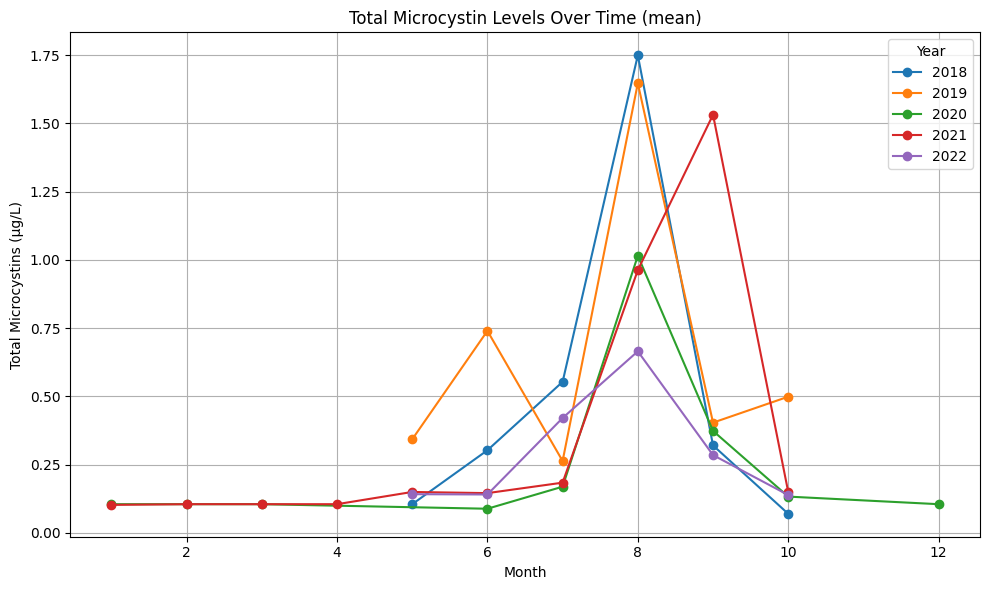

In [17]:
plt.figure(figsize=(10, 6))
for year in microcystin_monthly_mean['Year'].unique():
    yearly_data = microcystin_monthly_mean[microcystin_monthly_mean['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Total Microcystins (µg/L)'], marker='o', label=str(year))

plt.title('Total Microcystin Levels Over Time (mean)')
plt.xlabel('Month')
plt.ylabel('Total Microcystins (µg/L)')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
max_microcystin_level_mean = microcystin_monthly_mean['Total Microcystins (µg/L)'].max()
max_microcystin_level_mean

1.7495121951219512

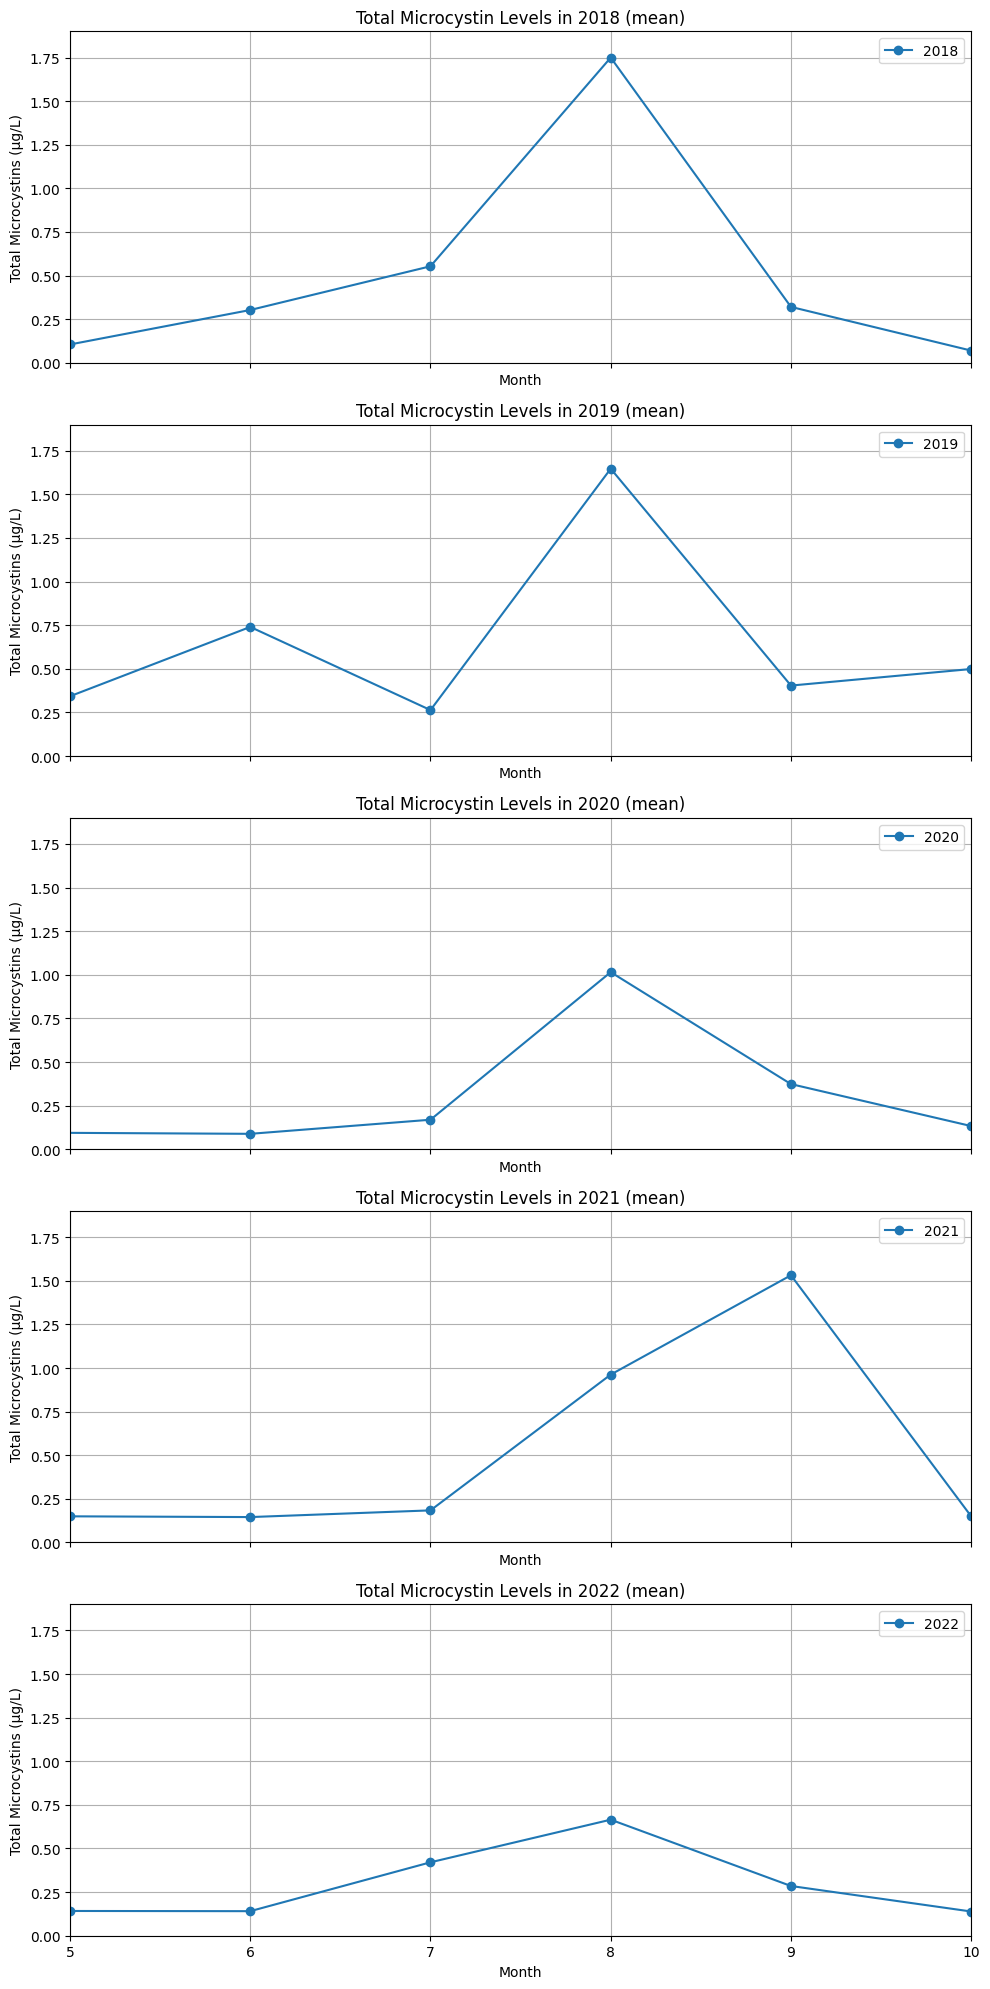

In [19]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True, sharey=True)

years = [2018, 2019, 2020, 2021, 2022]

for i, year in enumerate(years):
    yearly_data = microcystin_monthly_mean[microcystin_monthly_mean['Year'] == year]
    axs[i].plot(yearly_data['Month'], yearly_data['Total Microcystins (µg/L)'], marker='o', label=str(year))
    axs[i].set_title(f'Total Microcystin Levels in {year} (mean)')
    axs[i].set_ylim(0, 1.9)  
    axs[i].set_xlim(5, 10)  
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Total Microcystins (µg/L)')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [20]:
Stonelab['Time'] = (Stonelab['Date'].dt.year - Stonelab['Date'].dt.year.min()) * 12 + Stonelab['Date'].dt.month

X = sm.add_constant(Stonelab['Time']) 
y = Stonelab['Total Microcystins (µg/L)']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Total Microcystins (µg/L)   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.002
Method:                        Least Squares   F-statistic:                     3.150
Date:                       Fri, 12 Apr 2024   Prob (F-statistic):             0.0763
Time:                               20:20:23   Log-Likelihood:                -1477.0
No. Observations:                        932   AIC:                             2958.
Df Residuals:                            930   BIC:                             2968.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

C:\Users\alext\AppData\Local\Temp\ipykernel_21028\31607215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stonelab['Time'] = (Stonelab['Date'].dt.year - Stonelab['Date'].dt.year.min()) * 12 + Stonelab['Date'].dt.month


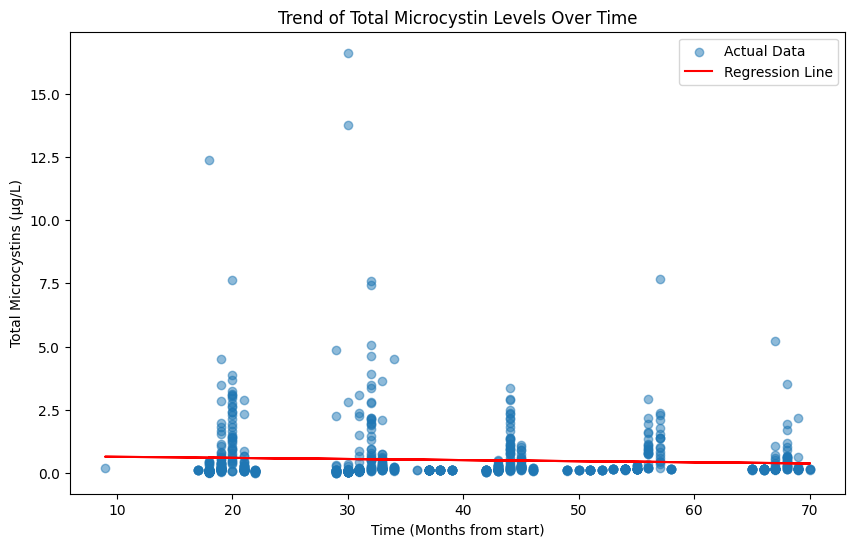

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(Stonelab['Time'], Stonelab['Total Microcystins (µg/L)'], alpha=0.5, label='Actual Data')
plt.plot(Stonelab['Time'], predictions, color='red', label='Regression Line')
plt.title('Trend of Total Microcystin Levels Over Time')
plt.xlabel('Time (Months from start)')
plt.ylabel('Total Microcystins (µg/L)')
plt.legend()
plt.show()

In [22]:
model = ols('Q("Total Microcystins (µg/L)") ~ C(Month)', data=Stonelab).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

               sum_sq     df         F        PR(>F)
C(Month)   136.633669   10.0  10.79038  1.739581e-17
Residual  1166.220395  921.0       NaN           NaN


In [23]:
model_yearly = ols('Q("Total Microcystins (µg/L)") ~ C(Year)', data=Stonelab).fit()
anova_table_yearly = sm.stats.anova_lm(model_yearly, typ=2)

print(anova_table_yearly)

               sum_sq     df         F    PR(>F)
C(Year)     13.041573    4.0  2.343274  0.053227
Residual  1289.812491  927.0       NaN       NaN


In [24]:
groups = [group["Total Microcystins (µg/L)"].values for name, group in Stonelab.groupby('Year')]

stat, p = kruskal(*groups)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=24.683, p=0.000
Different distributions (reject H0)


## Chlorophyll

In [25]:
Stonelab['Chlorophyll (µg/L)'] = pd.to_numeric(Stonelab['Chlorophyll (µg/L)'], errors='coerce')

C:\Users\alext\AppData\Local\Temp\ipykernel_21028\2541901552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stonelab['Chlorophyll (µg/L)'] = pd.to_numeric(Stonelab['Chlorophyll (µg/L)'], errors='coerce')


In [26]:
Stonelab = Stonelab.dropna(subset=['Chlorophyll (µg/L)'])

In [27]:
chlorophyll_monthly_mean = Stonelab.groupby(['Year', 'Month'])['Chlorophyll (µg/L)'].mean().reset_index()

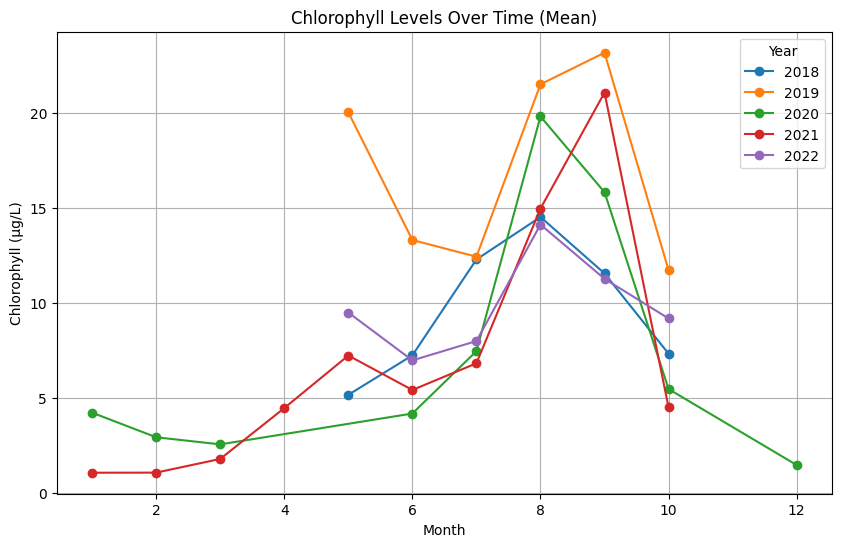

In [28]:
plt.figure(figsize=(10, 6))
for year in chlorophyll_monthly_mean['Year'].unique():
    yearly_data = chlorophyll_monthly_mean[chlorophyll_monthly_mean['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Chlorophyll (µg/L)'], marker='o', label=str(year))
plt.title('Chlorophyll Levels Over Time (Mean)')
plt.xlabel('Month')
plt.ylabel('Chlorophyll (µg/L)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [29]:
max_chlorophyll_level_mean = chlorophyll_monthly_mean['Chlorophyll (µg/L)'].max()
max_chlorophyll_level_mean

23.186341463414635

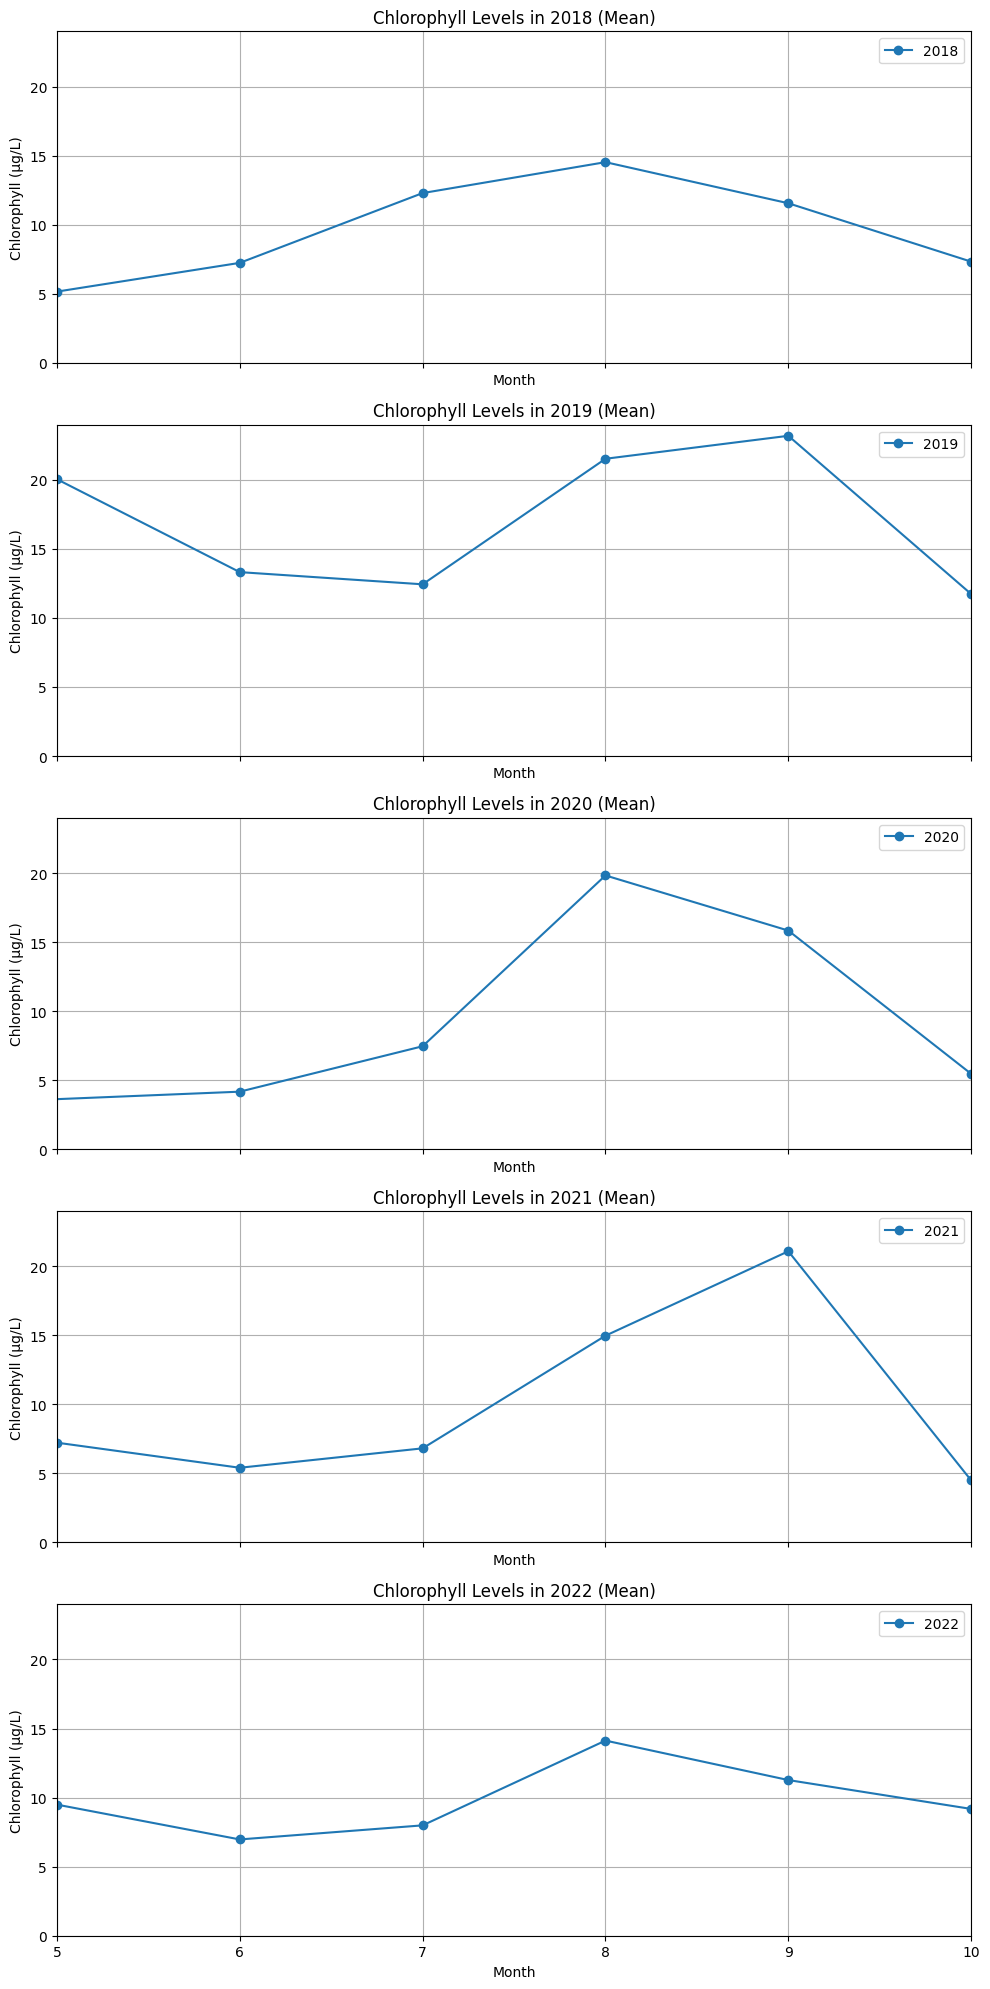

In [30]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True, sharey=True)
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    yearly_data = chlorophyll_monthly_mean[chlorophyll_monthly_mean['Year'] == year]
    axs[i].plot(yearly_data['Month'], yearly_data['Chlorophyll (µg/L)'], marker='o', label=str(year))
    axs[i].set_title(f'Chlorophyll Levels in {year} (Mean)')
    axs[i].set_ylim(0, 24)
    axs[i].set_xlim(5, 10)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Chlorophyll (µg/L)')
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()

In [31]:
X = sm.add_constant(Stonelab['Time']) 
y = Stonelab['Chlorophyll (µg/L)']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Chlorophyll (µg/L)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.288
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.131
Time:                        20:20:24   Log-Likelihood:                -3724.9
No. Observations:                 900   AIC:                             7454.
Df Residuals:                     898   BIC:                             7463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7276      1.329     10.326      0.0

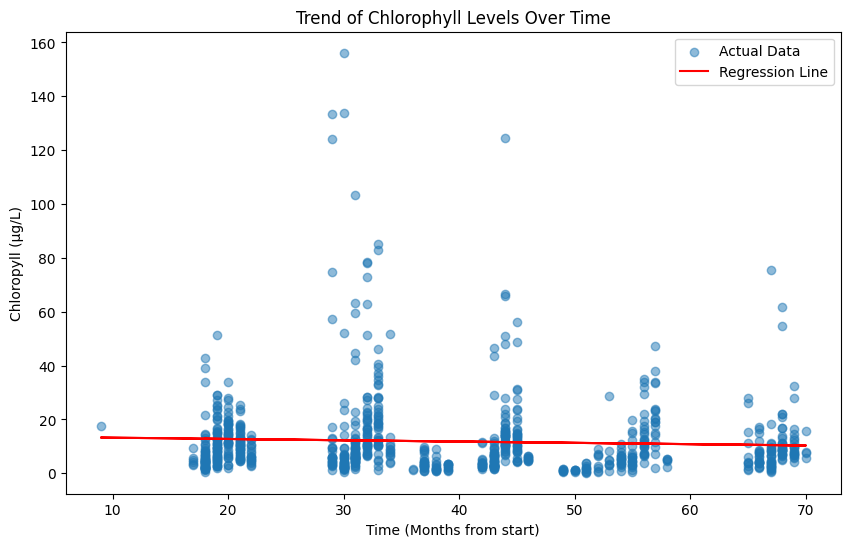

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(Stonelab['Time'], Stonelab['Chlorophyll (µg/L)'], alpha=0.5, label='Actual Data')
plt.plot(Stonelab['Time'], predictions, color='red', label='Regression Line')
plt.title('Trend of Chlorophyll Levels Over Time')
plt.xlabel('Time (Months from start)')
plt.ylabel('Chloropyll (µg/L)')
plt.legend()
plt.show()

In [33]:
model = ols('Q("Chlorophyll (µg/L)") ~ C(Month)', data=Stonelab).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                 sum_sq     df         F        PR(>F)
C(Month)   19629.030541   10.0  9.270323  1.026309e-14
Residual  188237.334025  889.0       NaN           NaN


In [34]:
model_yearly = ols('Q("Chlorophyll (µg/L)") ~ C(Year)', data=Stonelab).fit()
anova_table_yearly = sm.stats.anova_lm(model_yearly, typ=2)

print(anova_table_yearly)

                 sum_sq     df         F        PR(>F)
C(Year)     8497.109150    4.0  9.536215  1.492777e-07
Residual  199369.255416  895.0       NaN           NaN


In [35]:
groups = [group["Chlorophyll (µg/L)"].values for name, group in Stonelab.groupby('Year')]

stat, p = kruskal(*groups)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=34.205, p=0.000
Different distributions (reject H0)


## Bluegreen algae-chla

In [36]:
Stonelab['Bluegreen algae-chla µg/l'] = pd.to_numeric(Stonelab['Bluegreen algae-chla µg/l'], errors='coerce')

In [37]:
Stonelab = Stonelab.dropna(subset=['Bluegreen algae-chla µg/l'])

In [38]:
bluegreen_algae_monthly_mean = Stonelab.groupby(['Year', 'Month'])['Bluegreen algae-chla µg/l'].mean().reset_index()

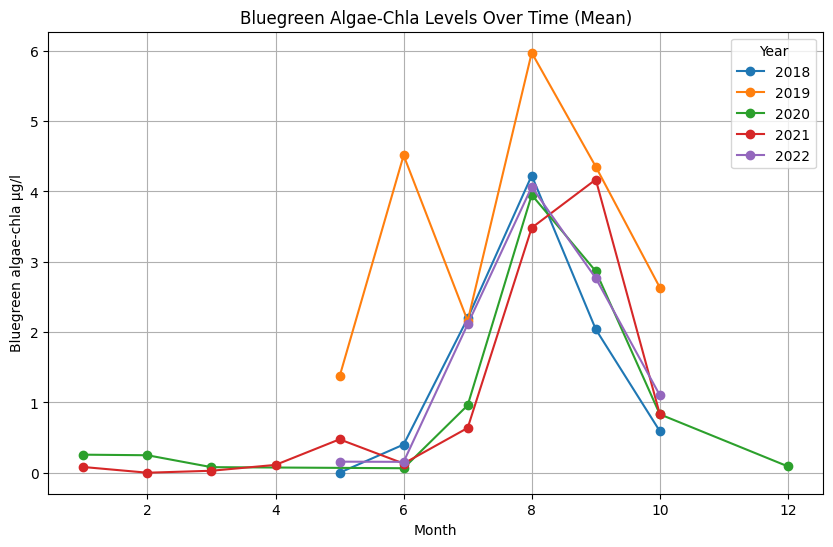

In [39]:
plt.figure(figsize=(10, 6))
for year in bluegreen_algae_monthly_mean['Year'].unique():
    yearly_data = bluegreen_algae_monthly_mean[bluegreen_algae_monthly_mean['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Bluegreen algae-chla µg/l'], marker='o', label=str(year))
plt.title('Bluegreen Algae-Chla Levels Over Time (Mean)')
plt.xlabel('Month')
plt.ylabel('Bluegreen algae-chla µg/l')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [40]:
max_bluegreen_algae_level_mean = bluegreen_algae_monthly_mean['Bluegreen algae-chla µg/l'].max()
max_bluegreen_algae_level_mean

5.97275

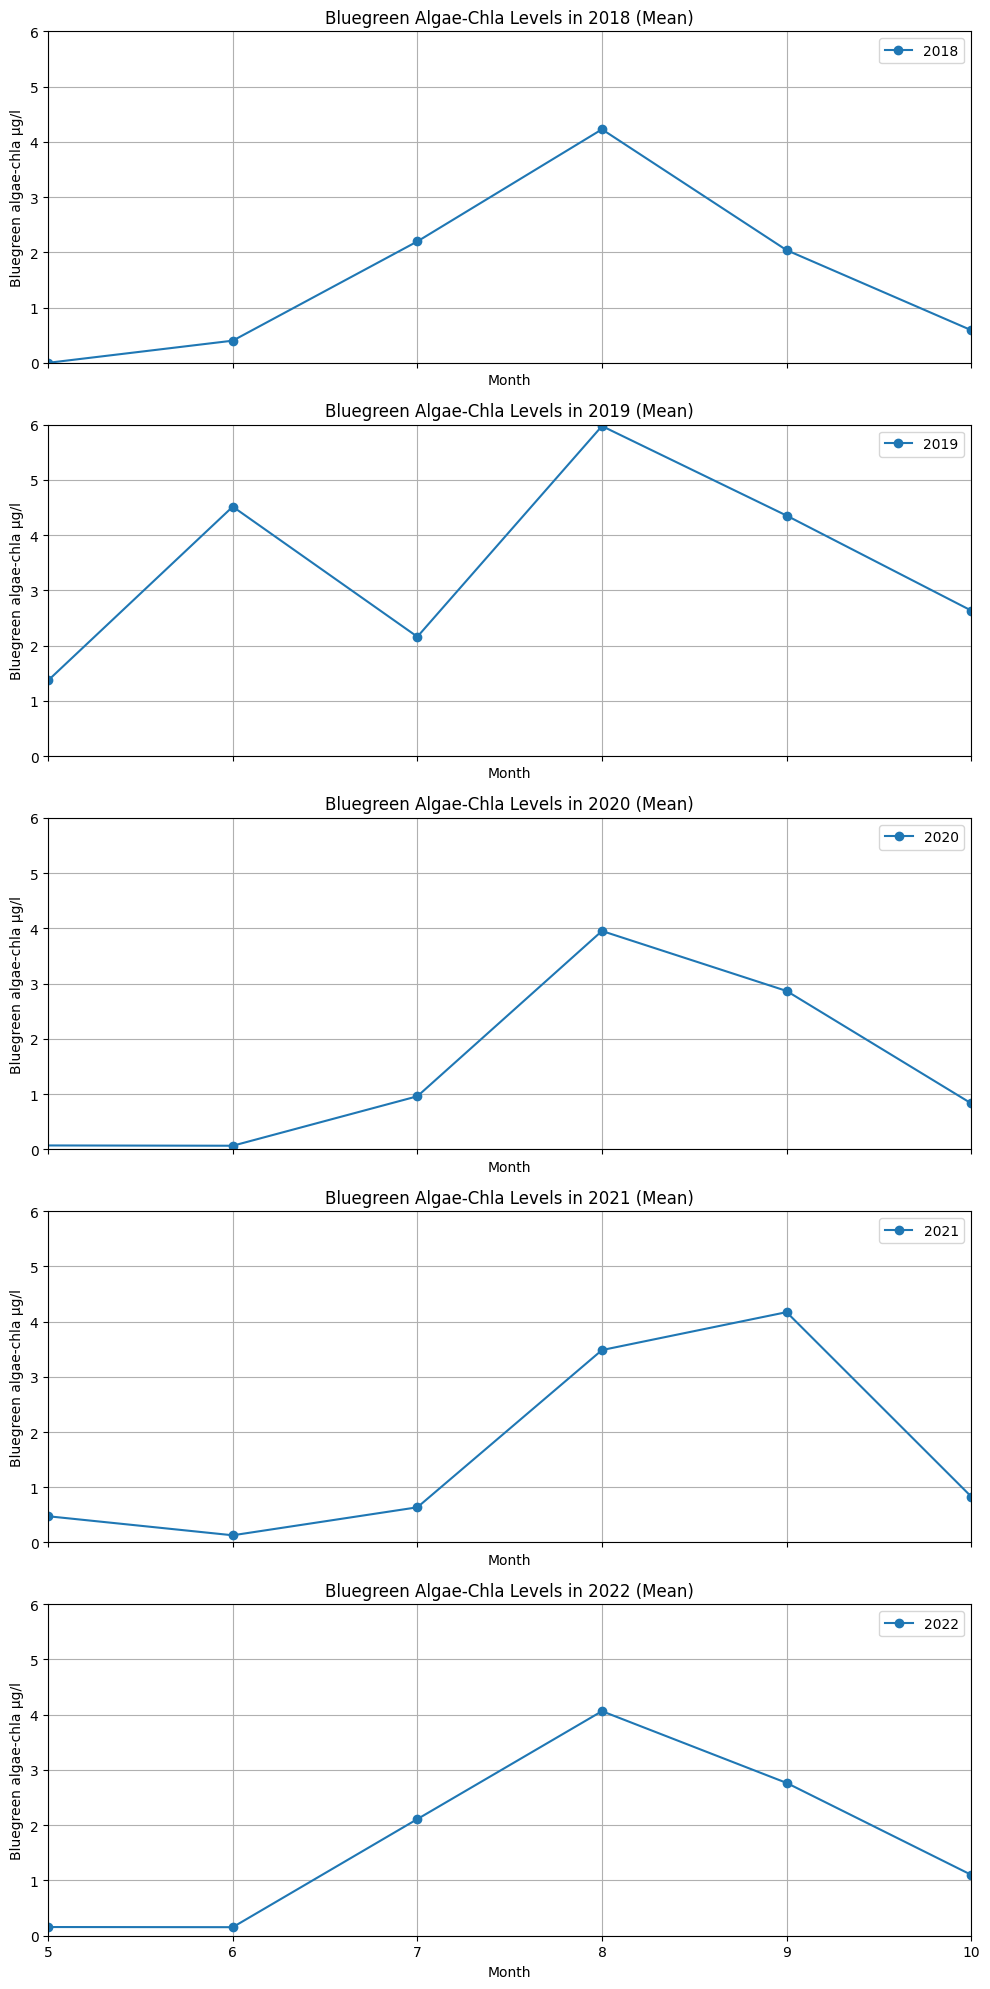

In [41]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True, sharey=True)
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    yearly_data = bluegreen_algae_monthly_mean[bluegreen_algae_monthly_mean['Year'] == year]
    axs[i].plot(yearly_data['Month'], yearly_data['Bluegreen algae-chla µg/l'], marker='o', label=str(year))
    axs[i].set_title(f'Bluegreen Algae-Chla Levels in {year} (Mean)')
    axs[i].set_ylim(0, 6)
    axs[i].set_xlim(5, 10)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Bluegreen algae-chla µg/l')
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()

In [42]:
X = sm.add_constant(Stonelab['Time']) 
y = Stonelab['Bluegreen algae-chla µg/l']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Bluegreen algae-chla µg/l   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.001
Method:                        Least Squares   F-statistic:                    0.3009
Date:                       Fri, 12 Apr 2024   Prob (F-statistic):              0.583
Time:                               20:20:25   Log-Likelihood:                -2808.0
No. Observations:                        893   AIC:                             5620.
Df Residuals:                            891   BIC:                             5630.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

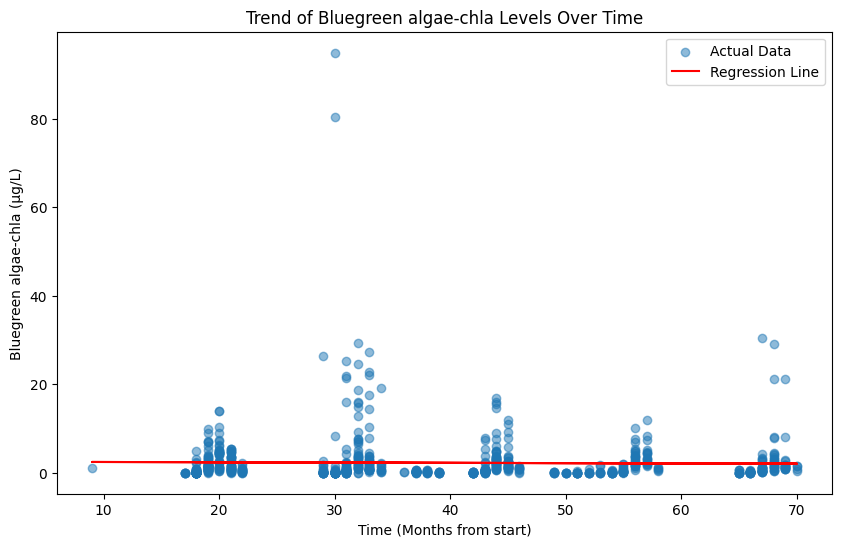

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(Stonelab['Time'], Stonelab['Bluegreen algae-chla µg/l'], alpha=0.5, label='Actual Data')
plt.plot(Stonelab['Time'], predictions, color='red', label='Regression Line')
plt.title('Trend of Bluegreen algae-chla Levels Over Time')
plt.xlabel('Time (Months from start)')
plt.ylabel('Bluegreen algae-chla (µg/L)')
plt.legend()
plt.show()

In [44]:
model = ols('Q("Bluegreen algae-chla µg/l") ~ C(Month)', data=Stonelab).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq     df         F        PR(>F)
C(Month)   1666.441630   10.0  5.546563  4.782250e-08
Residual  26499.320933  882.0       NaN           NaN


In [45]:
model_yearly = ols('Q("Bluegreen algae-chla µg/l") ~ C(Year)', data=Stonelab).fit()
anova_table_yearly = sm.stats.anova_lm(model_yearly, typ=2)

print(anova_table_yearly)

                sum_sq     df         F    PR(>F)
C(Year)     600.010392    4.0  4.832167  0.000737
Residual  27565.752171  888.0       NaN       NaN


In [46]:
groups = [group["Bluegreen algae-chla µg/l"].values for name, group in Stonelab.groupby('Year')]

stat, p = kruskal(*groups)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=10.194, p=0.037
Different distributions (reject H0)


## Algal Biomass (Chlorophyll + Bluegreen algae-chla)

In [47]:
Stonelab['Algal Biomass'] = Stonelab[['Chlorophyll (µg/L)', 'Bluegreen algae-chla µg/l']].mean(axis=1)
Stonelab['Algal Biomass']

1206    5.595
1207    3.240
1208    2.490
1209    3.045
1210    2.215
        ...  
2133    5.550
2134    5.360
2135    4.175
2136    3.115
2137    4.730
Name: Algal Biomass, Length: 893, dtype: float64

In [48]:
Stonelab = Stonelab.dropna(subset=['Algal Biomass'])

In [49]:
algal_monthly_mean = Stonelab.groupby(['Year', 'Month'])['Algal Biomass'].mean().reset_index()

In [50]:
algal_monthly_mean.to_csv('algal_monthly_mean.csv', index=False)

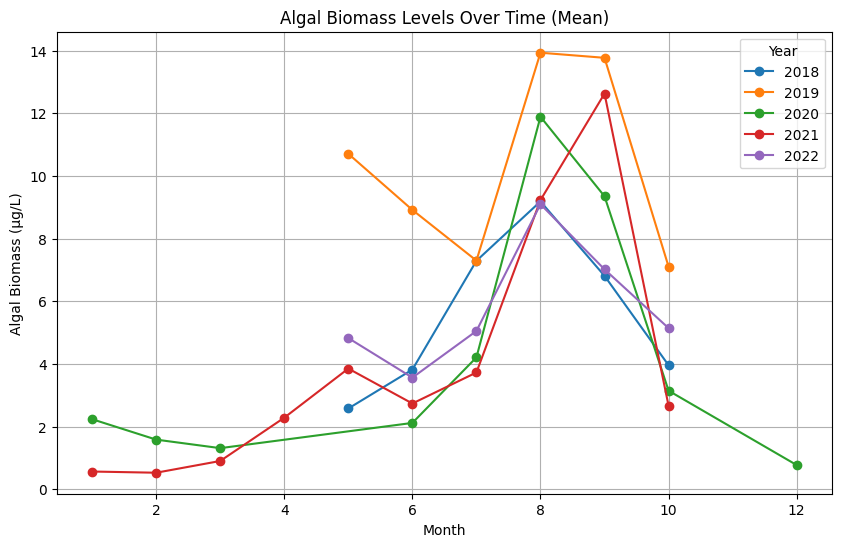

In [51]:
plt.figure(figsize=(10, 6))
for year in algal_monthly_mean['Year'].unique():
    yearly_data = algal_monthly_mean[algal_monthly_mean['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Algal Biomass'], marker='o', label=str(year))
plt.title('Algal Biomass Levels Over Time (Mean)')
plt.xlabel('Month')
plt.ylabel('Algal Biomass (µg/L)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [52]:
max_algal_level_mean = algal_monthly_mean['Algal Biomass'].max()
max_algal_level_mean

13.931875

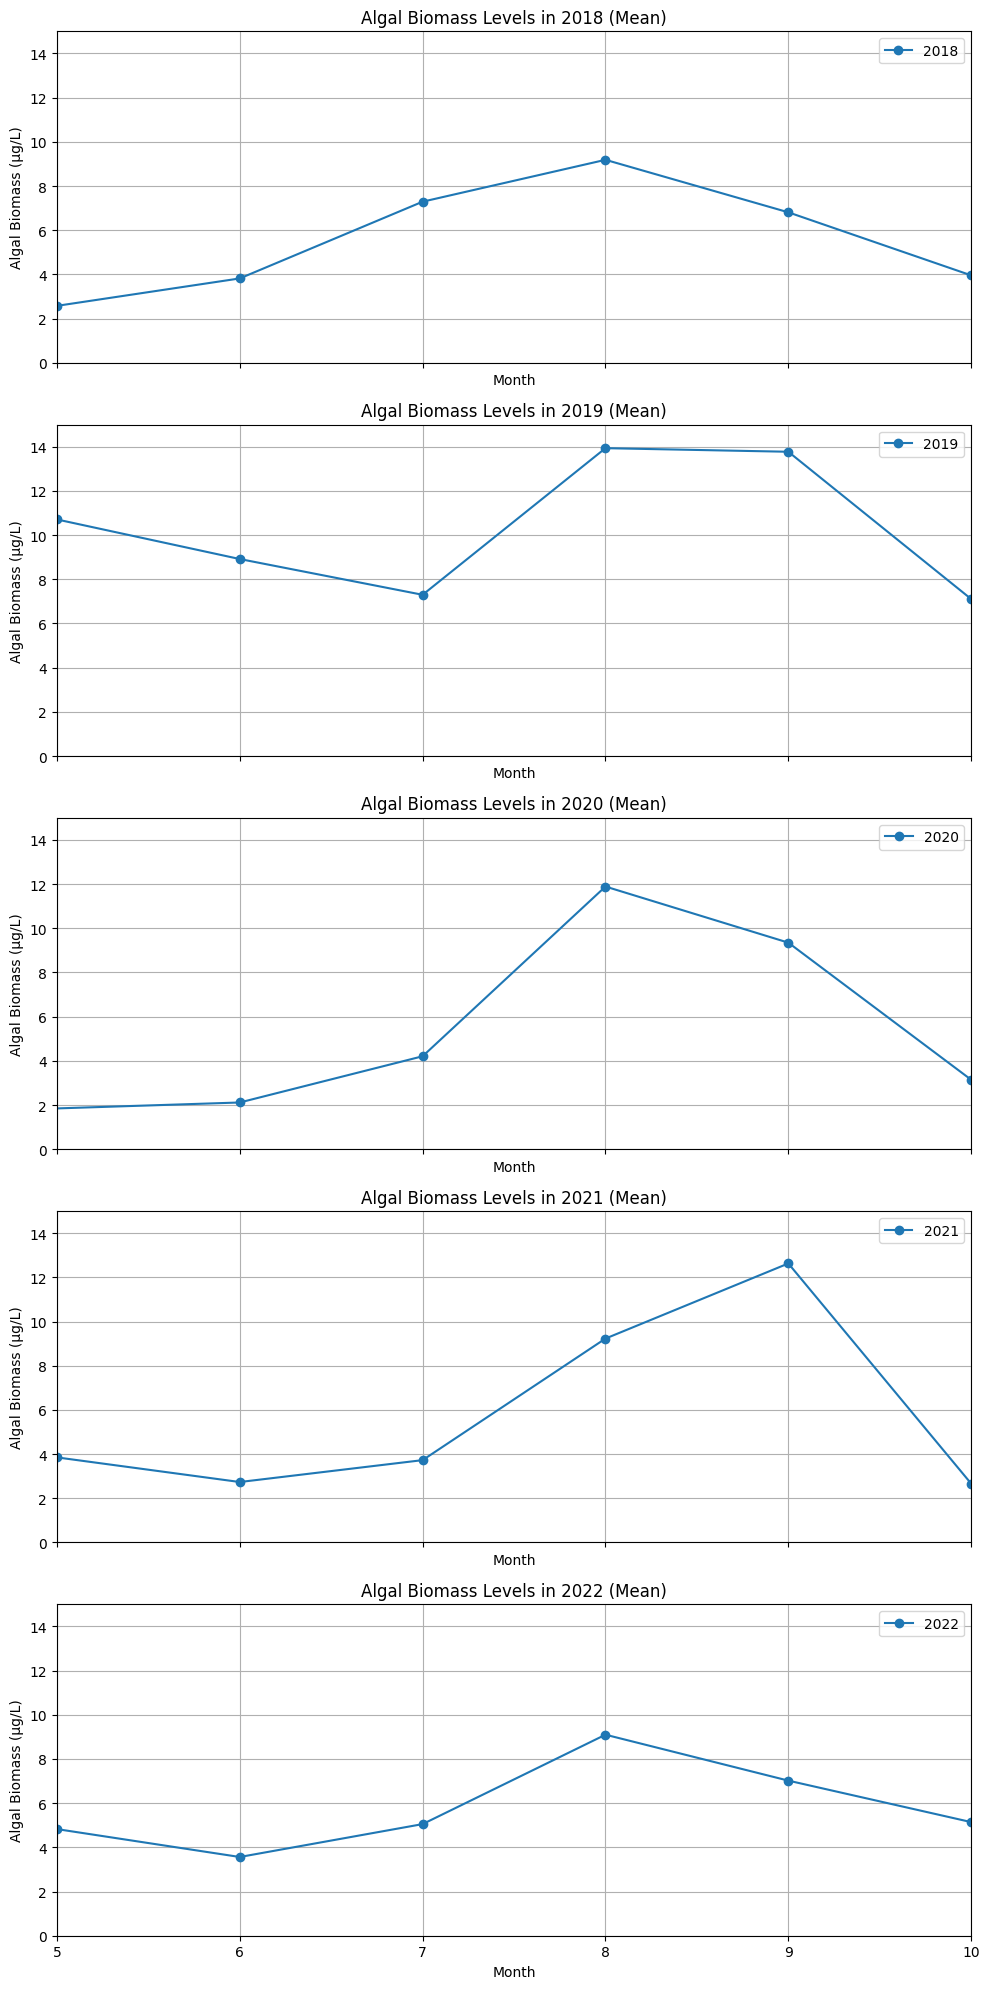

In [53]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True, sharey=True)
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    yearly_data = algal_monthly_mean[algal_monthly_mean['Year'] == year]
    axs[i].plot(yearly_data['Month'], yearly_data['Algal Biomass'], marker='o', label=str(year))
    axs[i].set_title(f'Algal Biomass Levels in {year} (Mean)')
    axs[i].set_ylim(0, 15)
    axs[i].set_xlim(5, 10)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Algal Biomass (µg/L)')
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()

In [54]:
X = sm.add_constant(Stonelab['Time']) 
y = Stonelab['Algal Biomass']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Algal Biomass   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.660
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.198
Time:                        20:20:26   Log-Likelihood:                -3313.9
No. Observations:                 893   AIC:                             6632.
Df Residuals:                     891   BIC:                             6641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0901      0.871      9.283      0.0

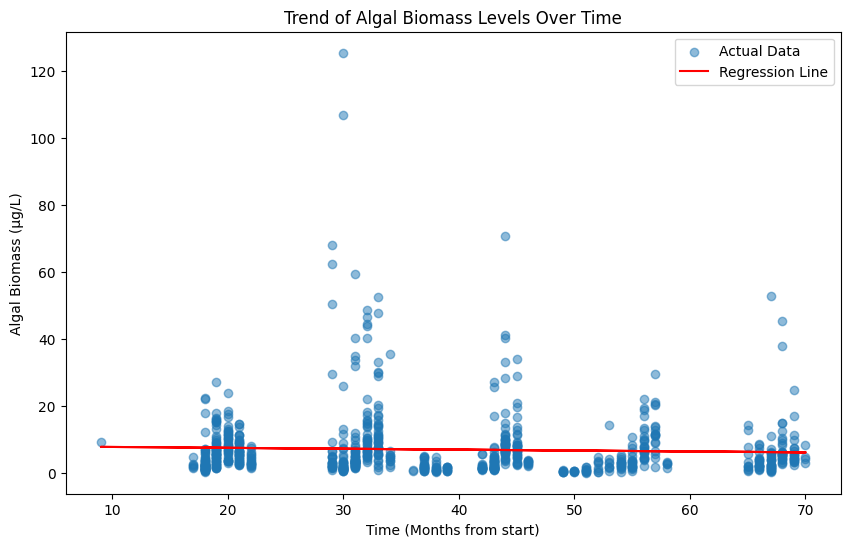

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(Stonelab['Time'], Stonelab['Algal Biomass'], alpha=0.5, label='Actual Data')
plt.plot(Stonelab['Time'], predictions, color='red', label='Regression Line')
plt.title('Trend of Algal Biomass Levels Over Time')
plt.xlabel('Time (Months from start)')
plt.ylabel('Algal Biomass (µg/L)')
plt.legend()
plt.show()

In [56]:
model = ols('Q("Algal Biomass") ~ C(Month)', data=Stonelab).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq     df         F        PR(>F)
C(Month)   7870.086619   10.0  8.706713  1.075613e-13
Residual  79724.879212  882.0       NaN           NaN


In [57]:
model_yearly = ols('Q("Algal Biomass") ~ C(Year)', data=Stonelab).fit()
anova_table_yearly = sm.stats.anova_lm(model_yearly, typ=2)

print(anova_table_yearly)

                sum_sq     df         F        PR(>F)
C(Year)    3421.148424    4.0  9.022936  3.813129e-07
Residual  84173.817408  888.0       NaN           NaN


In [58]:
groups = [group["Algal Biomass"].values for name, group in Stonelab.groupby('Year')]

stat, p = kruskal(*groups)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=32.249, p=0.000
Different distributions (reject H0)


## Water Temp at 1 meter

In [59]:
Stonelab['Water Temp at 1 meter (C)'] = pd.to_numeric(Stonelab['Water Temp at 1 meter (C)'], errors='coerce')

In [60]:
Stonelab = Stonelab.dropna(subset=['Water Temp at 1 meter (C)'])

In [61]:
water_temp_monthly_mean = Stonelab.groupby(['Year', 'Month'])['Water Temp at 1 meter (C)'].mean().reset_index()

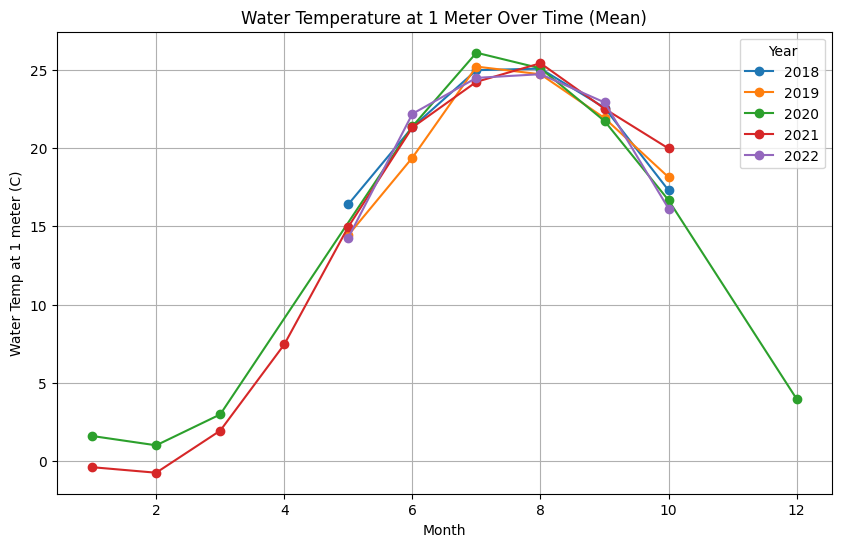

In [62]:
plt.figure(figsize=(10, 6))
for year in water_temp_monthly_mean['Year'].unique():
    yearly_data = water_temp_monthly_mean[water_temp_monthly_mean['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Water Temp at 1 meter (C)'], marker='o', label=str(year))
plt.title('Water Temperature at 1 Meter Over Time (Mean)')
plt.xlabel('Month')
plt.ylabel('Water Temp at 1 meter (C)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [63]:
max_water_temp_level_mean = water_temp_monthly_mean['Water Temp at 1 meter (C)'].max()
max_water_temp_level_mean

26.09894736842105

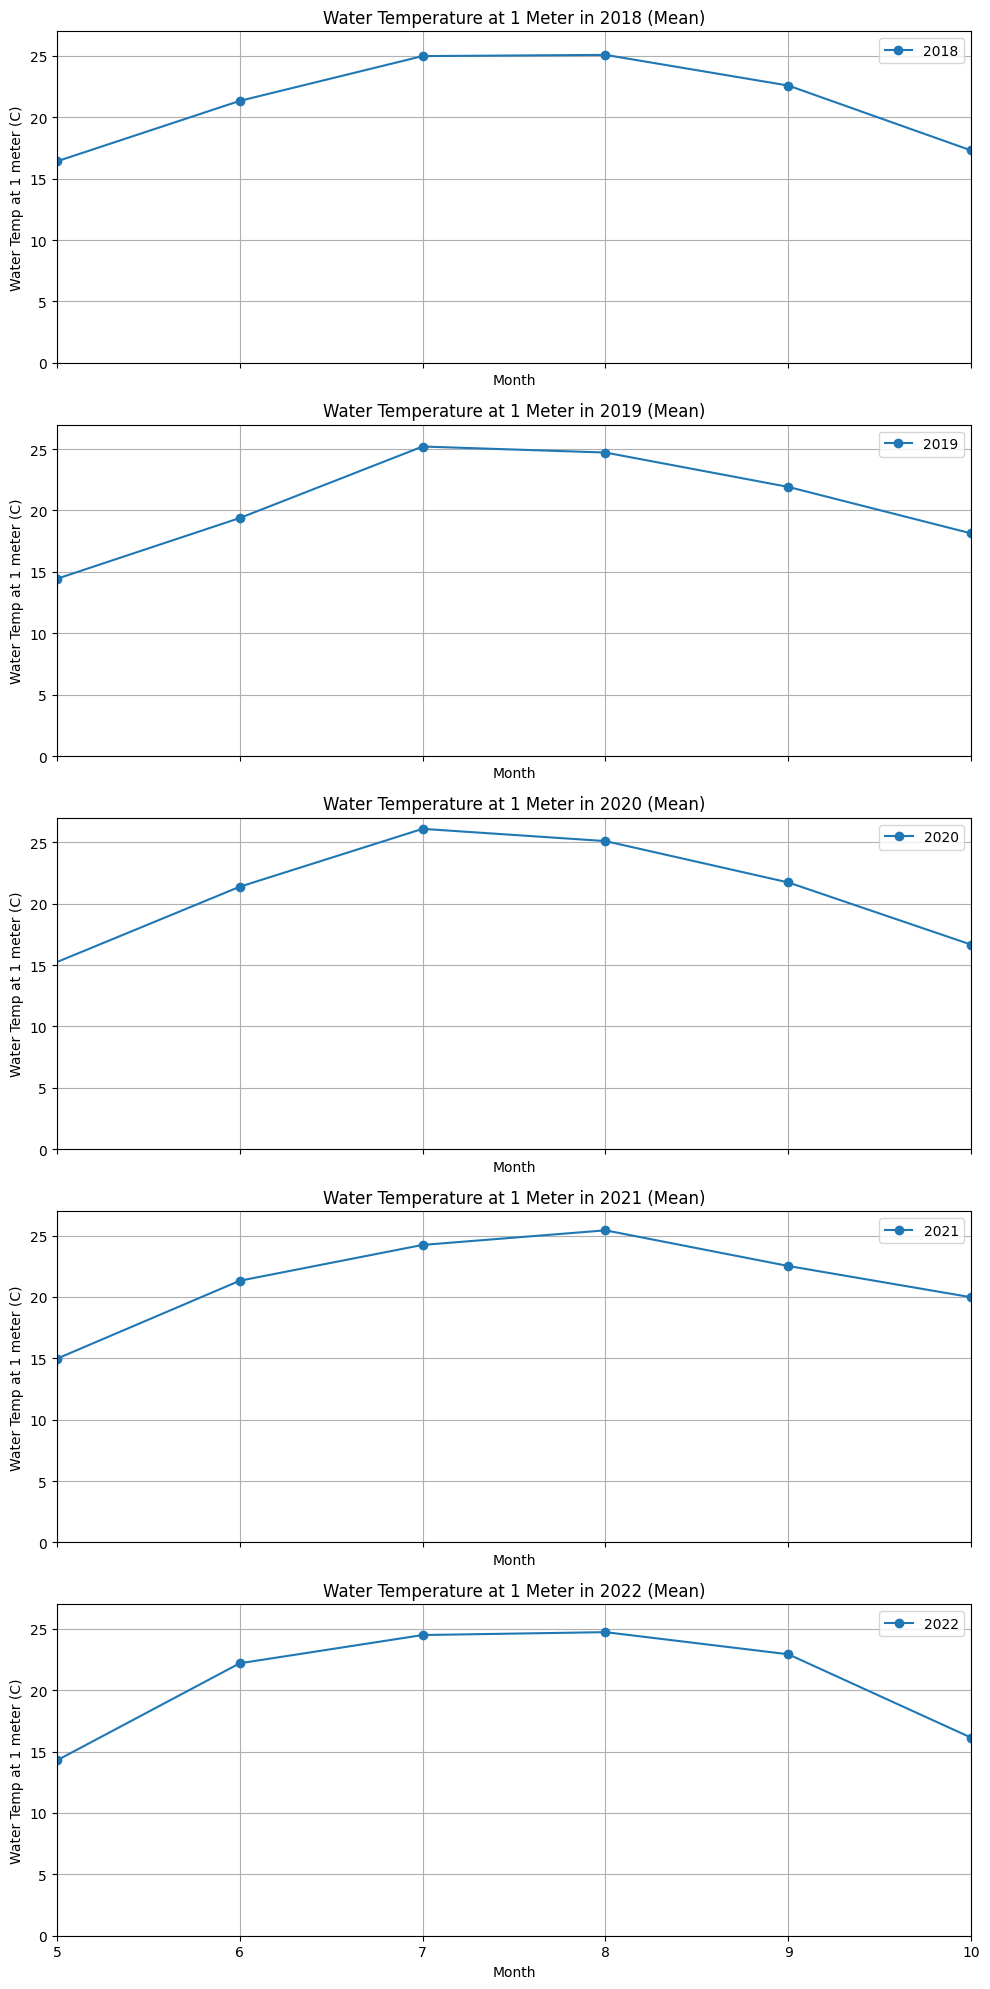

In [64]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True, sharey=True)
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    yearly_data = water_temp_monthly_mean[water_temp_monthly_mean['Year'] == year]
    axs[i].plot(yearly_data['Month'], yearly_data['Water Temp at 1 meter (C)'], marker='o', label=str(year))
    axs[i].set_title(f'Water Temperature at 1 Meter in {year} (Mean)')
    axs[i].set_ylim(0, 27)
    axs[i].set_xlim(5, 10)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Water Temp at 1 meter (C)')
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()

In [65]:
X = sm.add_constant(Stonelab['Time']) 
y = Stonelab['Water Temp at 1 meter (C)']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Water Temp at 1 meter (C)   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     1.331
Date:                       Fri, 12 Apr 2024   Prob (F-statistic):              0.249
Time:                               20:20:27   Log-Likelihood:                -2709.6
No. Observations:                        810   AIC:                             5423.
Df Residuals:                            808   BIC:                             5433.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

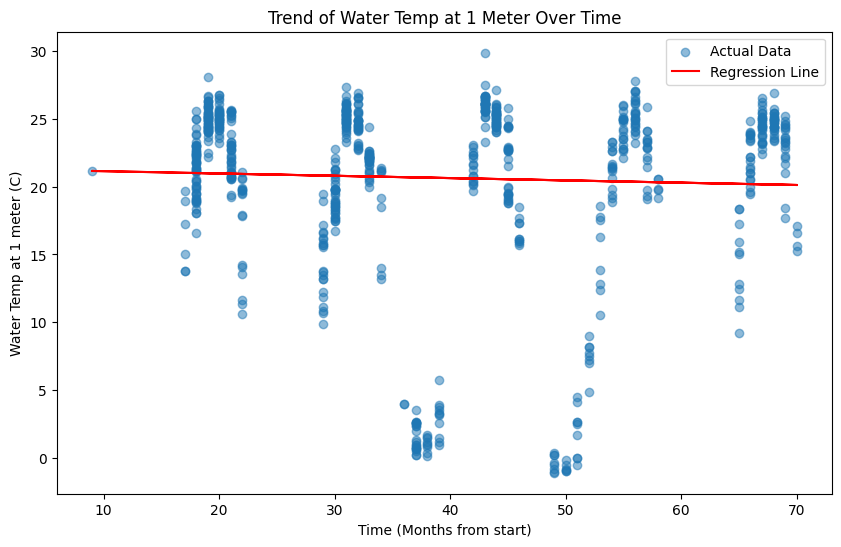

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(Stonelab['Time'], Stonelab['Water Temp at 1 meter (C)'], alpha=0.5, label='Actual Data')
plt.plot(Stonelab['Time'], predictions, color='red', label='Regression Line')
plt.title('Trend of Water Temp at 1 Meter Over Time')
plt.xlabel('Time (Months from start)')
plt.ylabel('Water Temp at 1 meter (C)')
plt.legend()
plt.show()

In [67]:
model = ols('Q("Water Temp at 1 meter (C)") ~ C(Month)', data=Stonelab).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq     df            F  PR(>F)
C(Month)  35977.216149   10.0  1281.242566     0.0
Residual   2243.587316  799.0          NaN     NaN


In [68]:
model_yearly = ols('Q("Water Temp at 1 meter (C)") ~ C(Year)', data=Stonelab).fit()
anova_table_yearly = sm.stats.anova_lm(model_yearly, typ=2)

print(anova_table_yearly)

                sum_sq     df          F        PR(>F)
C(Year)    3935.254049    4.0  23.099232  4.308664e-18
Residual  34285.549416  805.0        NaN           NaN


In [69]:
groups = [group["Water Temp at 1 meter (C)"].values for name, group in Stonelab.groupby('Year')]

stat, p = kruskal(*groups)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=17.478, p=0.002
Different distributions (reject H0)


## Secchi

In [70]:
Stonelab['Secchi (m)'] = pd.to_numeric(Stonelab['Secchi (m)'], errors='coerce')

In [71]:
Stonelab = Stonelab.dropna(subset=['Secchi (m)'])

In [72]:
secchi_monthly_mean = Stonelab.groupby(['Year', 'Month'])['Secchi (m)'].mean().reset_index()

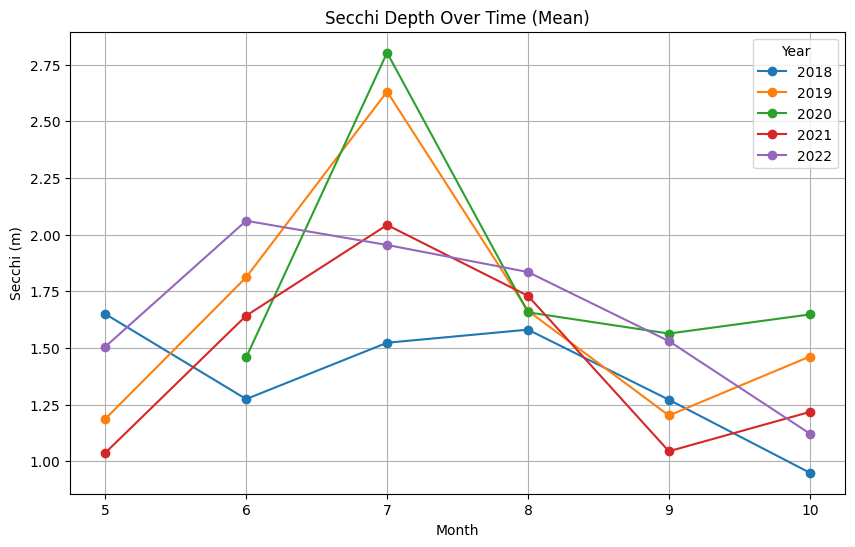

In [73]:
plt.figure(figsize=(10, 6))
for year in secchi_monthly_mean['Year'].unique():
    yearly_data = secchi_monthly_mean[secchi_monthly_mean['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Secchi (m)'], marker='o', label=str(year))
plt.title('Secchi Depth Over Time (Mean)')
plt.xlabel('Month')
plt.ylabel('Secchi (m)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [74]:
max_secchi_level_mean = secchi_monthly_mean['Secchi (m)'].max()
max_secchi_level_mean

2.8021739130434784

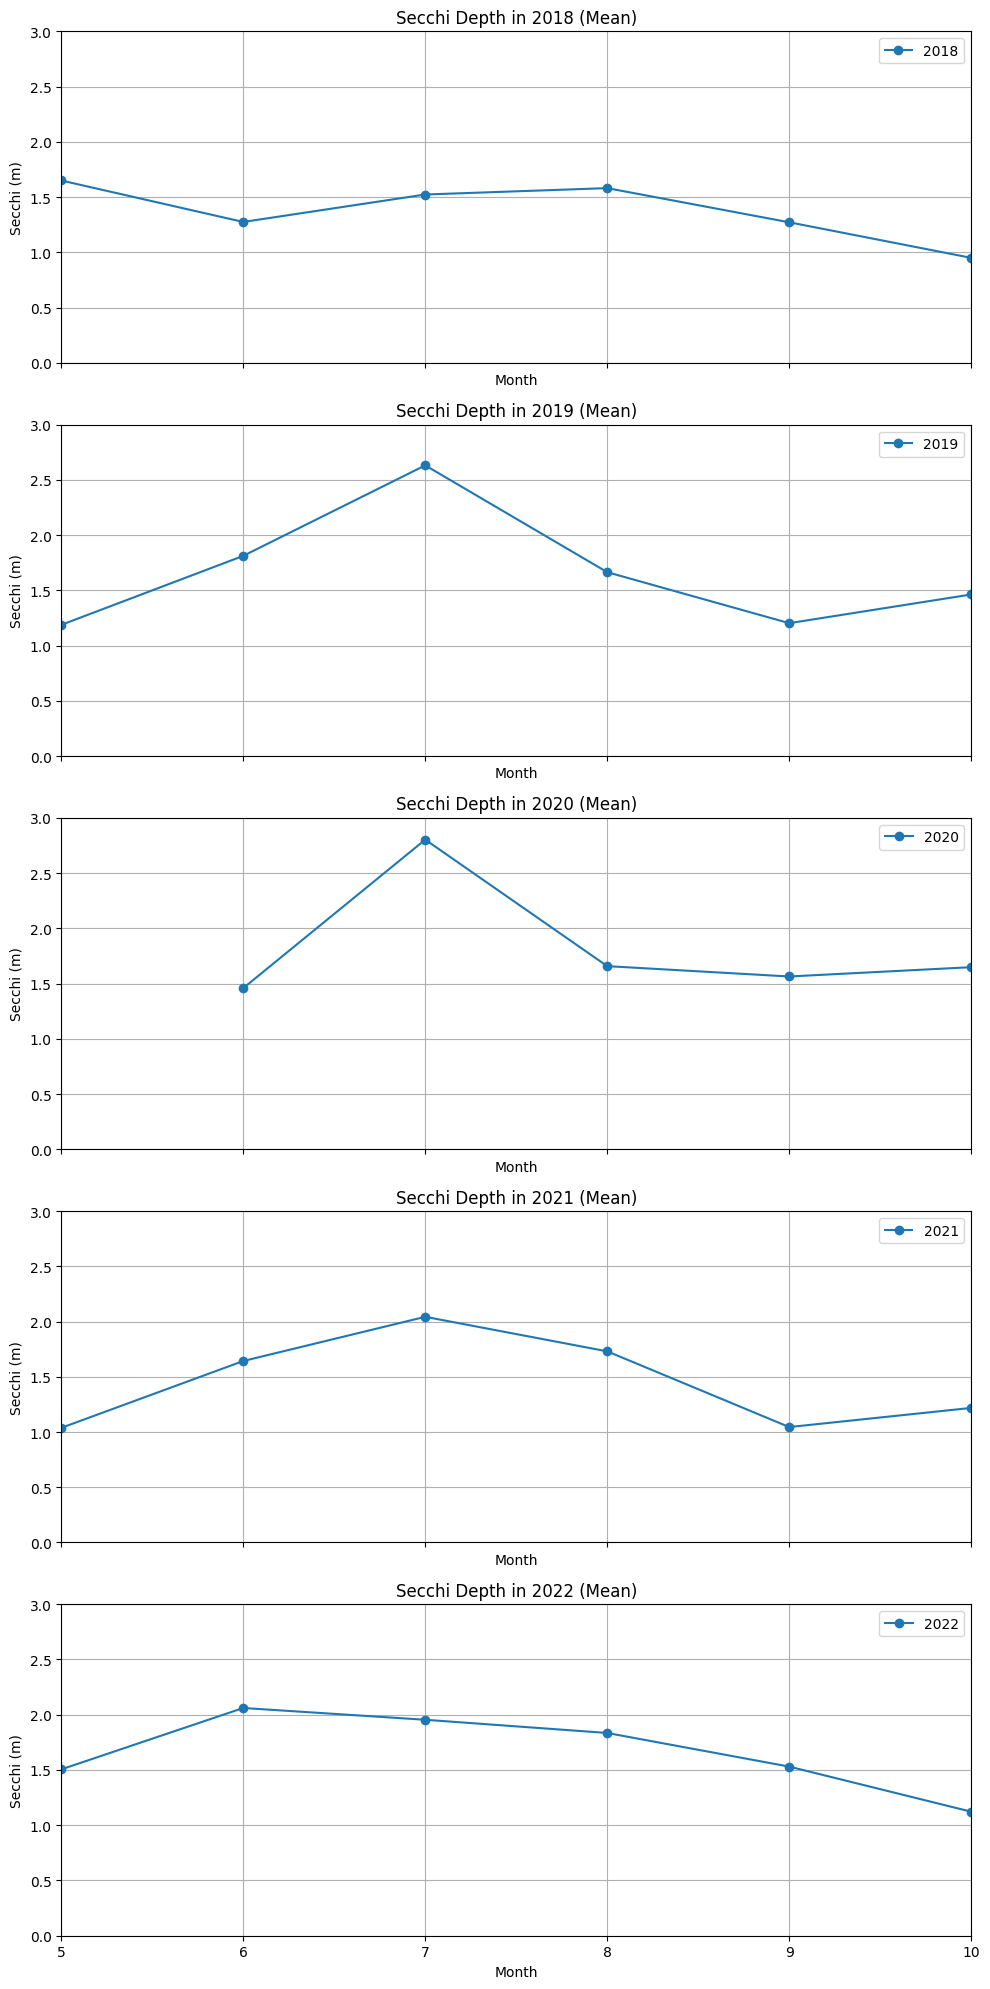

In [75]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True, sharey=True)
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    yearly_data = secchi_monthly_mean[secchi_monthly_mean['Year'] == year]
    axs[i].plot(yearly_data['Month'], yearly_data['Secchi (m)'], marker='o', label=str(year))
    axs[i].set_title(f'Secchi Depth in {year} (Mean)')
    axs[i].set_ylim(0, 3)
    axs[i].set_xlim(5, 10)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Secchi (m)')
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()

In [76]:
X = sm.add_constant(Stonelab['Time']) 
y = Stonelab['Secchi (m)']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Secchi (m)   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     8.307
Date:                Fri, 12 Apr 2024   Prob (F-statistic):            0.00408
Time:                        20:20:28   Log-Likelihood:                -894.72
No. Observations:                 664   AIC:                             1793.
Df Residuals:                     662   BIC:                             1802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4209      0.089     16.041      0.0

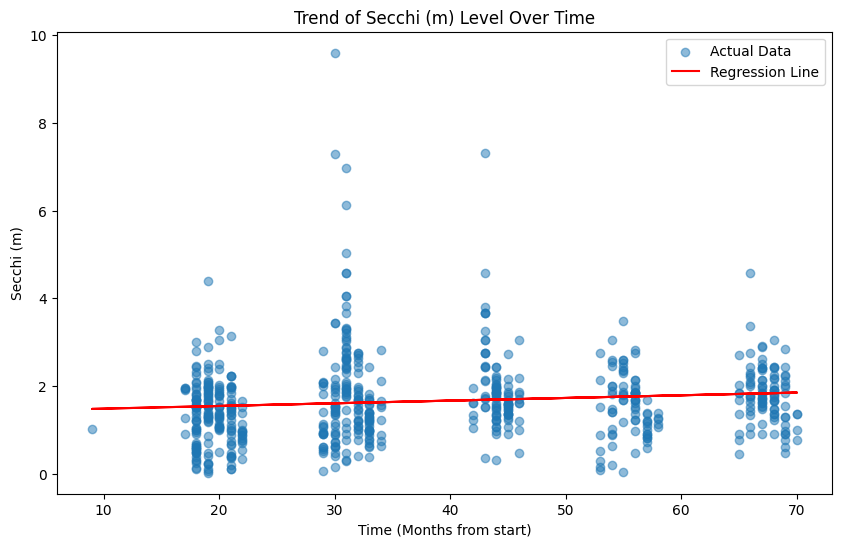

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(Stonelab['Time'], Stonelab['Secchi (m)'], alpha=0.5, label='Actual Data')
plt.plot(Stonelab['Time'], predictions, color='red', label='Regression Line')
plt.title('Trend of Secchi (m) Level Over Time')
plt.xlabel('Time (Months from start)')
plt.ylabel('Secchi (m)')
plt.legend()
plt.show()

In [78]:
model = ols('Q("Secchi (m)") ~ C(Month)', data=Stonelab).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

              sum_sq     df          F        PR(>F)
C(Month)   68.735605    5.0  17.596738  2.214030e-16
Residual  514.050148  658.0        NaN           NaN


In [79]:
model_yearly = ols('Q("Secchi (m)") ~ C(Year)', data=Stonelab).fit()
anova_table_yearly = sm.stats.anova_lm(model_yearly, typ=2)

print(anova_table_yearly)

              sum_sq     df         F    PR(>F)
C(Year)    28.122666    4.0  8.353195  0.000001
Residual  554.663087  659.0       NaN       NaN


In [80]:
groups = [group["Secchi (m)"].values for name, group in Stonelab.groupby('Year')]

stat, p = kruskal(*groups)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=34.463, p=0.000
Different distributions (reject H0)


## Nutrients

In [81]:
nutrients = ['TP (µg P/L)', 'DRP (µg P/L)', 'Nitrate+NO2 (µg N/L)', 'Ammonium (µg N/L)', 
             'Nitrite (µg N/L)', 'TN (µg N/L)', 'TN:TP (mass)']
nutrient_means = Stonelab.groupby(['Year', 'Month'])[nutrients].mean().reset_index()

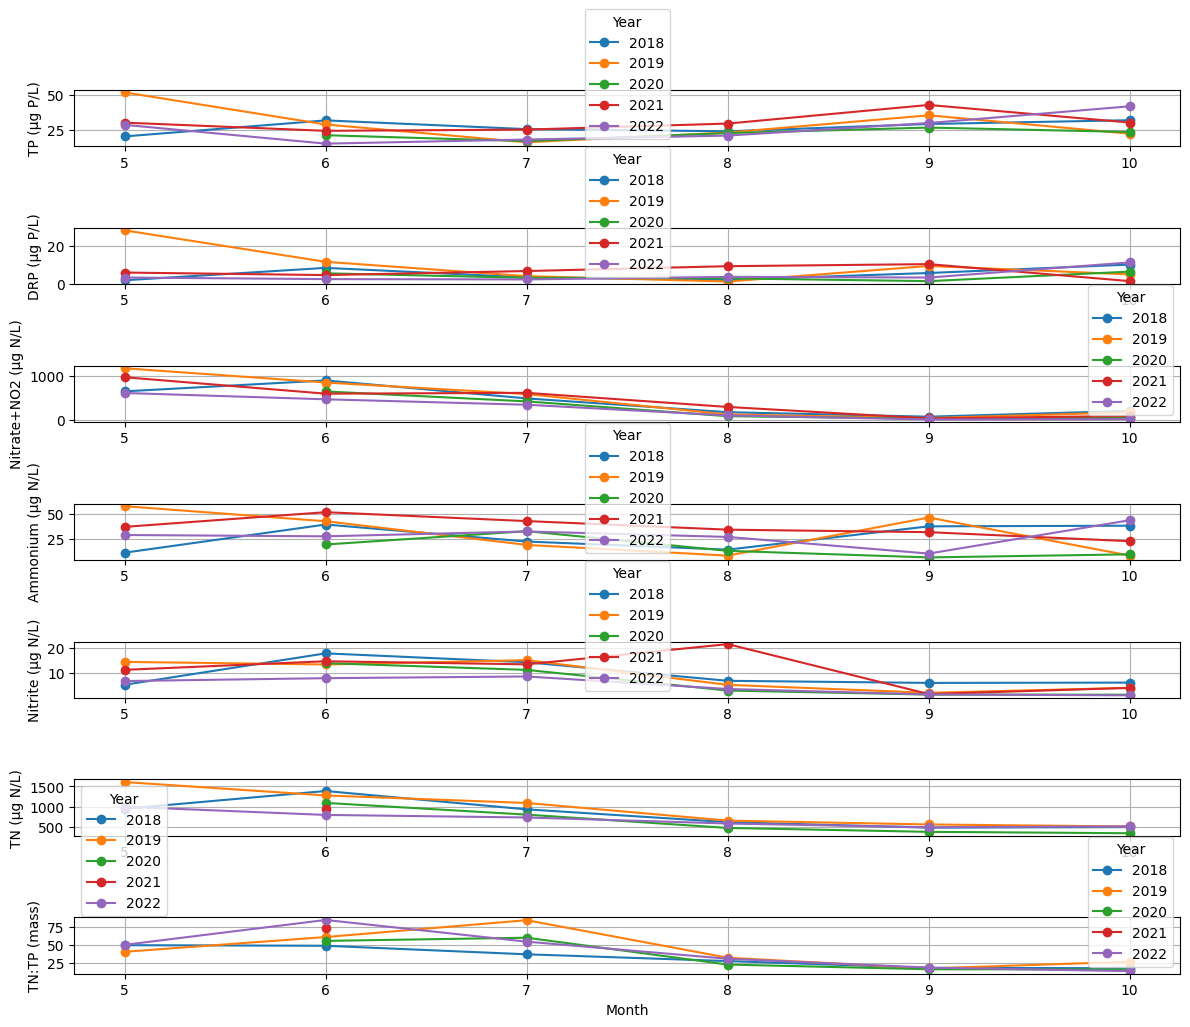

In [82]:
plt.figure(figsize=(12, 10))

for i, nutrient in enumerate(nutrients, 1):
    plt.subplot(len(nutrients), 1, i)
    
    for year in nutrient_means['Year'].unique():
        yearly_data = nutrient_means[nutrient_means['Year'] == year]
        plt.plot(yearly_data['Month'], yearly_data[nutrient], marker='o', label=str(year))
        
    plt.ylabel(nutrient)
    if i == len(nutrients):
        plt.xlabel('Month')
    plt.legend(title='Year')
    plt.grid(True)


plt.tight_layout()
plt.show()

**Total Phosphorus (TP)** and **Dissolved Reactive Phosphorus (DRP)** are key indicators of phosphorus levels in the water. Phosphorus is a critical nutrient that can fuel the growth of algae, including harmful algae. Elevated levels of TP and DRP are often associated with an increased risk of HABs.

**Nitrate+NO2 (Nitrate + Nitrite), Ammonium, and Nitrite** represent different forms of nitrogen available in the water. Nitrogen, like phosphorus, is a vital nutrient for algal growth. The forms of nitrogen, including nitrate, nitrite, and ammonium, can influence the composition and potential for algal blooms.

**Total Nitrogen (TN)** provides a comprehensive measure of all forms of nitrogen present, offering insight into the overall nitrogen availability in the ecosystem.

**TN:TP (molar) ratio** is crucial for understanding the balance between nitrogen and phosphorus in the water. Certain ratios are more favorable for the growth of cyanobacteria, a common group responsible for HABs. This ratio helps predict the potential for cyanobacterial dominance based on nutrient availability.

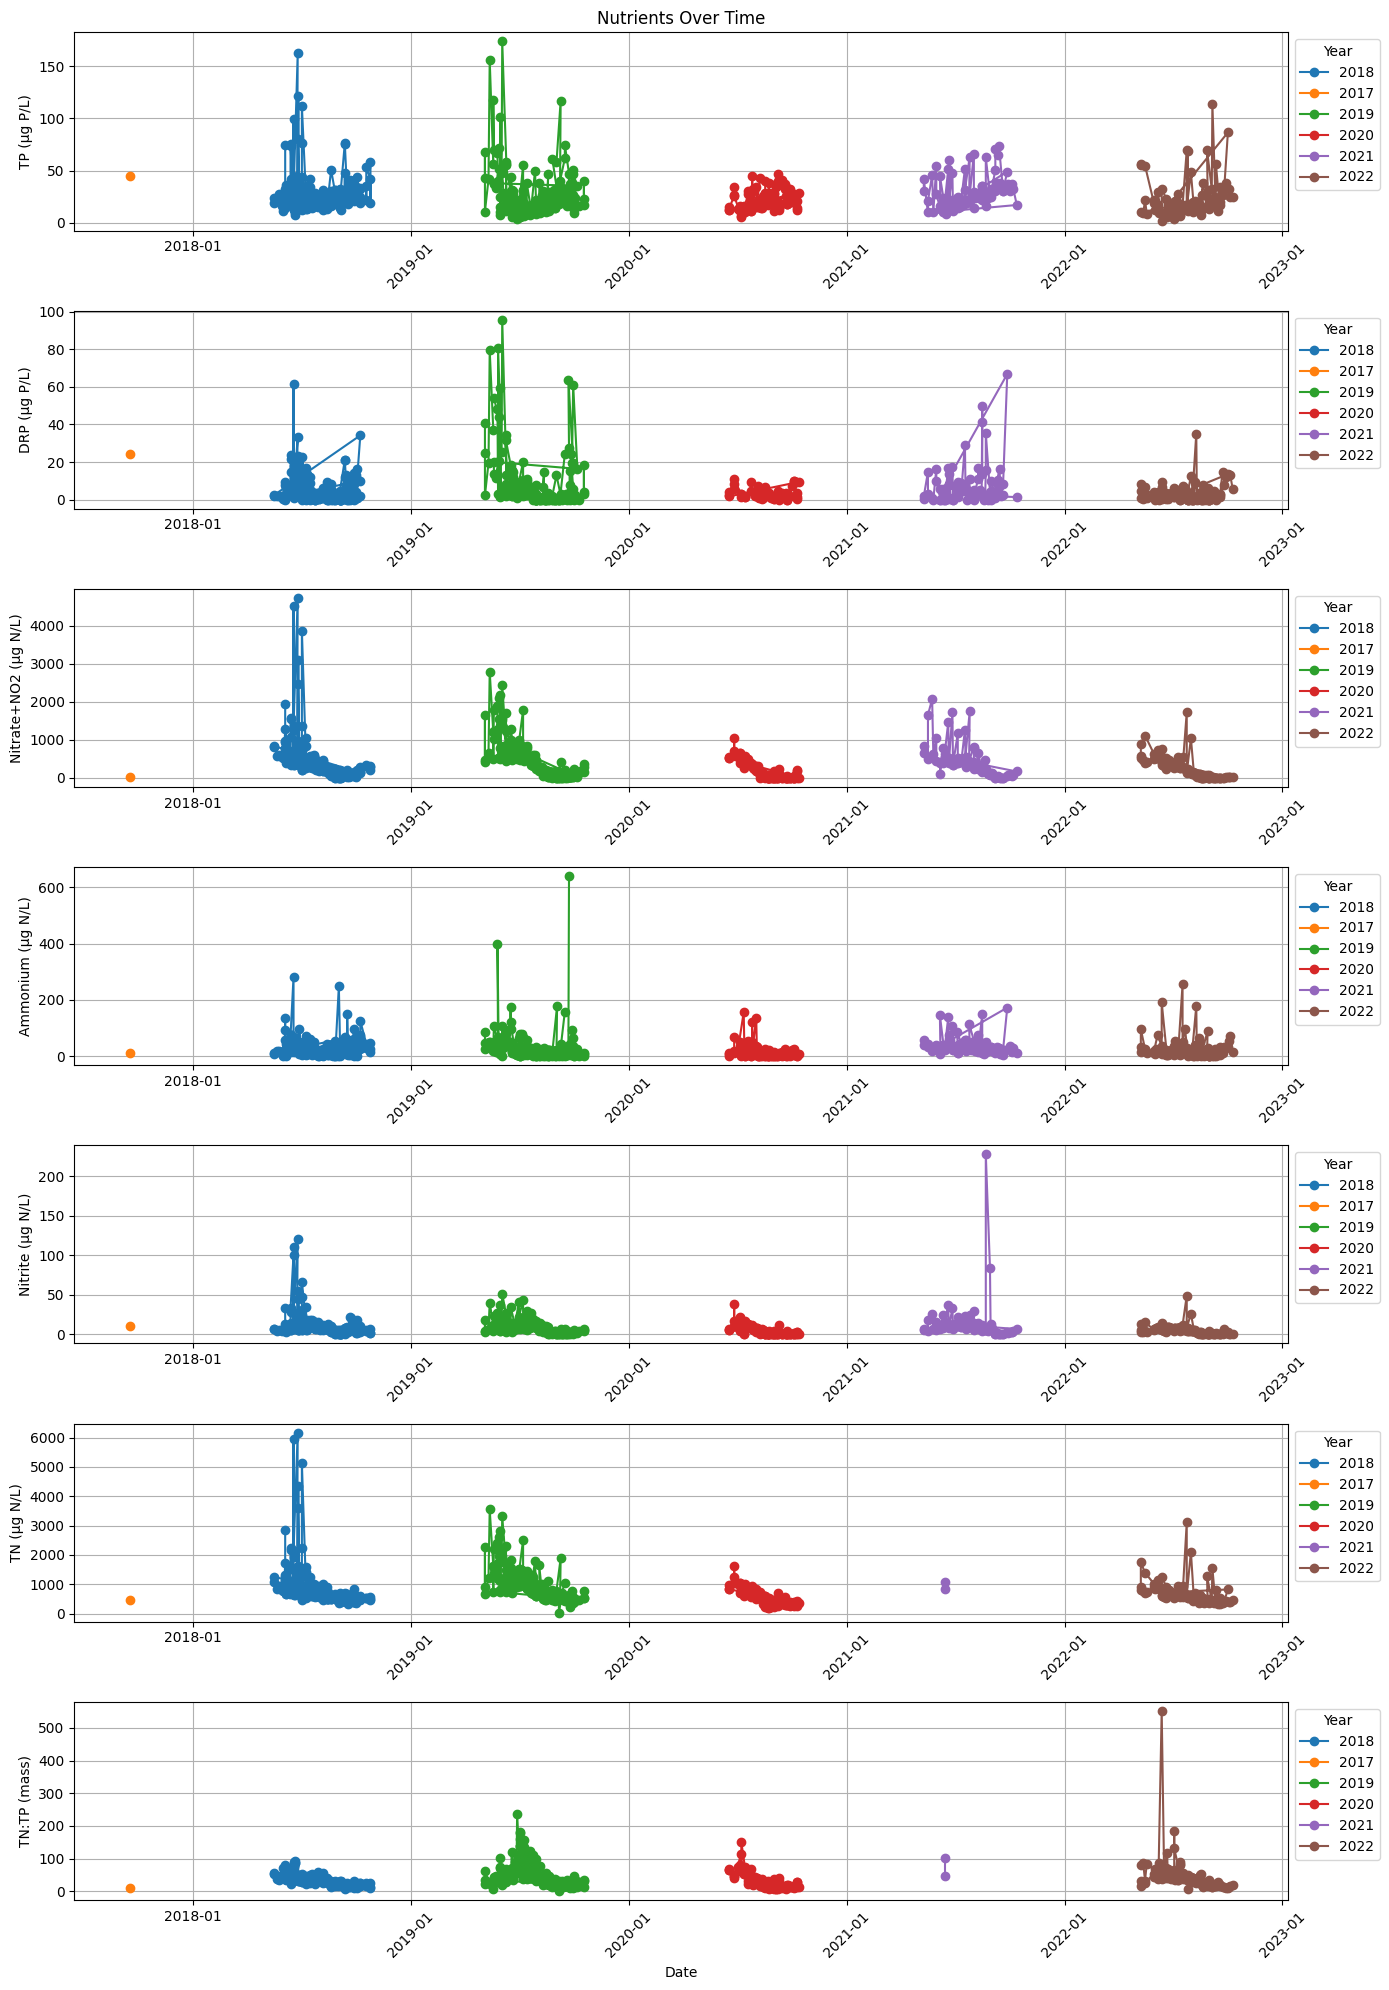

In [83]:
plt.figure(figsize=(14, 20))

for i, nutrient in enumerate(nutrients, 1):
    ax = plt.subplot(len(nutrients), 1, i)
    ax.xaxis_date() 
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    
    for year in Stonelab['Date'].dt.year.unique():
        yearly_data = Stonelab[Stonelab['Date'].dt.year == year]
        ax.plot(yearly_data['Date'], yearly_data[nutrient], marker='o', linestyle='-', label=str(year))

    ax.set_ylabel(nutrient)
    if i == 1:
        ax.set_title('Nutrients Over Time')
    if i == len(nutrients):
        ax.set_xlabel('Date')
    
    ax.grid(True)
    ax.legend(title='Year', loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

Due to the large amount of nutrient variables, we decided to just observe TN:TP ratio as it is the most indicative of HABs of all of the nutrient variables.

The TN:TP (Total Nitrogen to Total Phosphorus) ratio is a critical factor in aquatic ecology, particularly when assessing the potential for HABs, which are often dominated by cyanobacteria. This ratio can provide insights into nutrient limiation and the likelihood of different types of algae prevailing.

High TN:TP Ratio:

- A high TN:TP ratio indicates a relatively higher concentration of nitrogen compared to phosphorus. In such conditions, phosphorus becomes the limiting nutrient because there is plenty of nitrogen available for algal growth, but not enough phosphorus to match it.
- When the TN:TP ratio is high, the growth of cyanobacteria might be less favored compared to other types of algae. This is because cyanobacteria can often fix atmospheric nitrogen when nitrogen is limited, giving them an advantage in low nitrogen conditions. Therefore, in high TN:TP environments, non-nitrogen-fixing algae might dominate instead.

Low TN:TP Ratio:

- Conversely, a low TN:TP ratio indicates a higher relative concentration of phosphorus compared to nitrogen. In these conditions, nitrogen becomes the limiting nutrient.
- Low TN:TP ratios are typically more favorable for the growth of cyanobacteria, particularly those species capable of nitrogen fixation. Cyanobacteria can thrive in such environments because they can supplement the limited available nitrogen by fixing nitrogen from the atmosphere, thus outcompeting other algae that depend solely on available dissolved nitrogen.

Average TN:TP Ratio:

- Ratios above 22:1 tend to favor green algae and diatoms, while lower ratios (near 10:1 or less) can favor cyanobacteria.

In [84]:
Stonelab = Stonelab.dropna(subset=['TN:TP (molar)'])

In [85]:
TNTP_monthly_mean = Stonelab.groupby(['Year', 'Month'])['TN:TP (molar)'].mean().reset_index()

In [86]:
TNTP_monthly_mean.to_csv('TNTP_monthly_mean.csv', index=False)

In [87]:
Stonelab['TN:TP (molar)'].value_counts()

TN:TP (molar)
84.283     1
174.592    1
90.218     1
46.816     1
44.930     1
          ..
26.307     1
54.070     1
20.775     1
46.886     1
41.205     1
Name: count, Length: 576, dtype: int64

In [88]:
Stonelab_2021TNTP_issue = Stonelab[Stonelab['Year']==2021]
Stonelab_2021TNTP_issue.head()

,Year,Program,ID#,Date,Time,Site/Captain,Lat,Long,Depth (m),Secchi (m),...,DRP (µg P/L),Silicate (µg Si/L),Nitrate (µg N/L),TP (µg P/L),TKN (µg N/L),TN (µg N/L),TN:TP (mass),Month,MonthName,Algal Biomass
2021,2021,Stone Lab,2021SL001,2021-06-14,54,WE2,41.76233,-83.2158,10.36,2.0,...,2.79,526.08,532.63,10.72,531.51,1078.06,100.593670,6,June,2.90
2022,2021,Stone Lab,2021SL002,2021-06-14,54,WE2,41.76233,-83.2158,10.36,2.0,...,0.00,568.91,532.18,17.13,278.47,824.63,48.143634,6,June,2.91


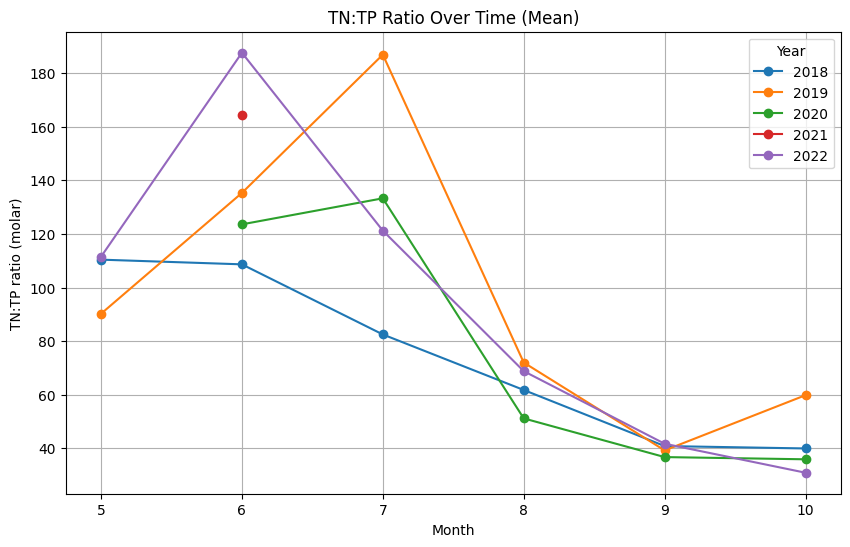

In [89]:
plt.figure(figsize=(10, 6))
for year in TNTP_monthly_mean['Year'].unique():
    yearly_data = TNTP_monthly_mean[TNTP_monthly_mean['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['TN:TP (molar)'], marker='o', label=str(year))
plt.title('TN:TP Ratio Over Time (Mean)')
plt.xlabel('Month')
plt.ylabel('TN:TP ratio (molar)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

Values from 2021 are missing due to a lack of TN (Total Nitrogen) values in 2021.

In [90]:
X = sm.add_constant(Stonelab['Time']) 
y = Stonelab['TN:TP (molar)']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          TN:TP (molar)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8368
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.361
Time:                        20:20:29   Log-Likelihood:                -3333.1
No. Observations:                 576   AIC:                             6670.
Df Residuals:                     574   BIC:                             6679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0939      7.714     10.902      0.0

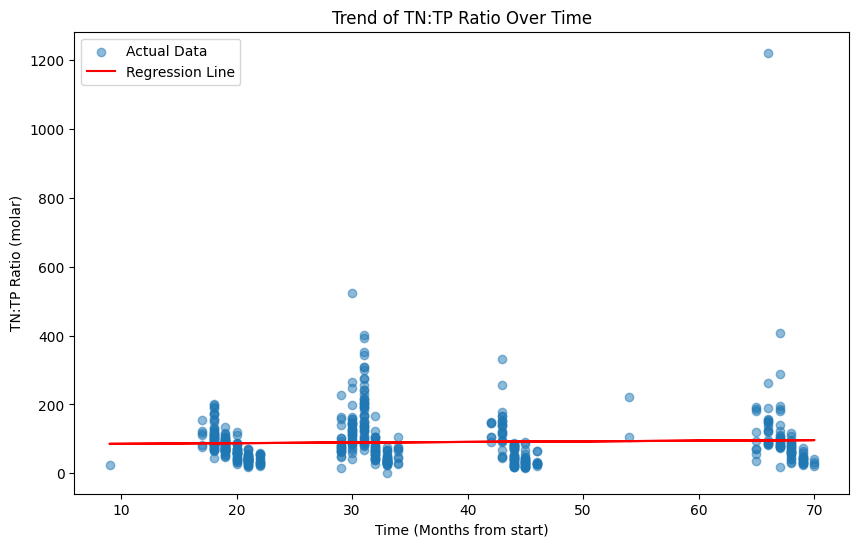

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(Stonelab['Time'], Stonelab['TN:TP (molar)'], alpha=0.5, label='Actual Data')
plt.plot(Stonelab['Time'], predictions, color='red', label='Regression Line')
plt.title('Trend of TN:TP Ratio Over Time')
plt.xlabel('Time (Months from start)')
plt.ylabel('TN:TP Ratio (molar)')
plt.legend()
plt.show()

In [92]:
model = ols('Q("TN:TP (molar)") ~ C(Month)', data=Stonelab).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq     df          F        PR(>F)
C(Month)  9.310094e+05    5.0  39.948771  3.197528e-35
Residual  2.656779e+06  570.0        NaN           NaN


In [93]:
model_yearly = ols('Q("TN:TP (molar)") ~ C(Year)', data=Stonelab).fit()
anova_table_yearly = sm.stats.anova_lm(model_yearly, typ=2)

print(anova_table_yearly)

                sum_sq     df         F        PR(>F)
C(Year)   2.036762e+05    4.0  8.591552  9.753066e-07
Residual  3.384113e+06  571.0       NaN           NaN


In [94]:
groups = [group["TN:TP (molar)"].values for name, group in Stonelab.groupby('Year')]

stat, p = kruskal(*groups)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=41.222, p=0.000
Different distributions (reject H0)


## Data Collection Locations

In [95]:
lake_erie_map = folium.Map(location=[Stonelab['Lat'].mean(), Stonelab['Long'].mean()], zoom_start=10)

In [96]:
for idx, row in Stonelab.iterrows():
    folium.Marker([row['Lat'], row['Long']]).add_to(lake_erie_map)

In [97]:
lake_erie_map

## Total Microcystins Geographical Heatmap (interactive)

In [98]:
Stonelab['Normalized_Microcystins'] = (Stonelab['Total Microcystins (µg/L)'] - Stonelab['Total Microcystins (µg/L)'].min()) / \
                                  (Stonelab['Total Microcystins (µg/L)'].max() - Stonelab['Total Microcystins (µg/L)'].min())

In [99]:
map_ = folium.Map(location=[Stonelab['Lat'].mean(), Stonelab['Long'].mean()], zoom_start=10)

HeatMap(Stonelab[['Lat', 'Long', 'Normalized_Microcystins']].values, radius=20, max_zoom=13).add_to(map_)

In [100]:
map_

Red - High Concentration of Microcystins

Orange

Yellow

Green

Blue - Low Concentration of Microcystins

In [101]:
map_output_path = 'Geoheatmap_interactive.html'
map_.save(map_output_path)

map_output_path

'Geoheatmap_interactive.html'

## Total Microcystins by Coordinates Scatter Plot

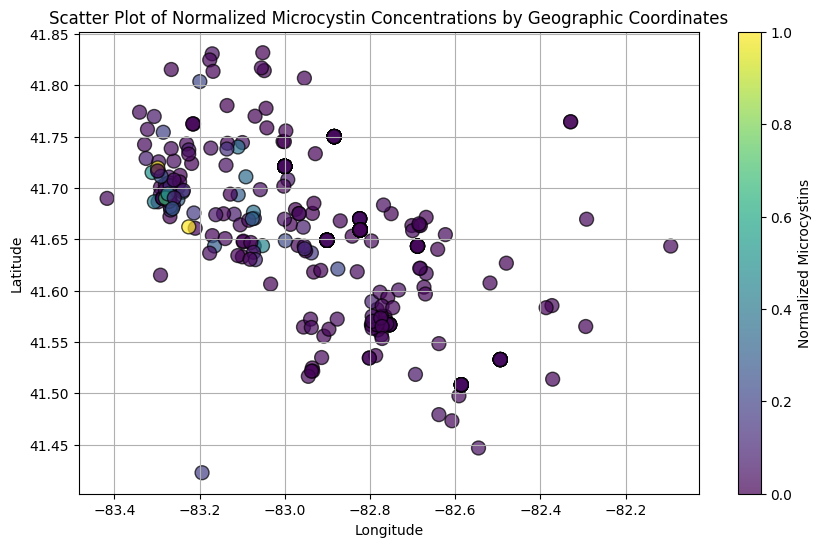

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(Stonelab['Long'], Stonelab['Lat'], c=Stonelab['Normalized_Microcystins'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)
plt.colorbar(label='Normalized Microcystins')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Normalized Microcystin Concentrations by Geographic Coordinates')
plt.grid(True)
plt.show()